In [3]:
# Importation des bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [4]:
# Chargement des données
achats = pd.read_excel(r'C:\Users\MEDIA TEK\Desktop\achats_commande.xlsx')

In [5]:

achats.shape

(23107, 18)

In [6]:
#Affichage des 5 premiers lignes
achats.head(4)

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,Date commande,Date réception,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,3081600,D051008,03/01/2022,2022-01-12 00:00:00,9,25,Conforme,5006997,Société Mohamed,Gafsa
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,04/01/2022,2022-01-20 00:00:00,16,8,Conforme,5005182,Société Gharbi,Nabeul
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,05/01/2022,2022-01-30 00:00:00,25,4,Conforme,5006889,Société Hammami,Tataouine
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,03/01/2022,2022-01-15 00:00:00,12,3,Conforme,5007369,Société Allah,Jendouba


In [7]:
# Vérification des types de données
achats.dtypes


Société                 int64
N°commande              int64
Type commande          object
Code article           object
Article                object
Type article           object
Quantité              float64
UM                     object
Montant                 int64
Centre de cout         object
Date commande          object
Date réception         object
durée de livraion       int64
délai de livraison      int64
conformité             object
Code Fournisseur        int64
Nom Fournisseur        object
adresse                object
dtype: object

In [8]:
#Affichage des informations du DataFrame
achats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23107 entries, 0 to 23106
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Société             23107 non-null  int64  
 1   N°commande          23107 non-null  int64  
 2   Type commande       23107 non-null  object 
 3   Code article        23107 non-null  object 
 4   Article             23107 non-null  object 
 5   Type article        23107 non-null  object 
 6   Quantité            23107 non-null  float64
 7   UM                  23107 non-null  object 
 8   Montant             23107 non-null  int64  
 9   Centre de cout      23107 non-null  object 
 10  Date commande       23107 non-null  object 
 11  Date réception      23107 non-null  object 
 12  durée de livraion   23107 non-null  int64  
 13  délai de livraison  23107 non-null  int64  
 14  conformité          23107 non-null  object 
 15  Code Fournisseur    23107 non-null  int64  
 16  Nom 

In [9]:
#Affichage des 5 derniéres lignes
achats.tail()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,Date commande,Date réception,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse
23102,5,24900731,OR,HSCLN0015,frais de participation,Service,2.0,PI,1344538,D051008,24/10/2024,31/10/2024,7,25,Conforme,559911,Société Ben Mabrouk,Sidi Bouzid
23103,5,24900731,OR,HSCLN0015,hebergement,Service,2.0,PI,280374,D051008,24/10/2024,31/10/2024,7,25,Conforme,559911,Société Ben Mabrouk,Kasserine
23104,5,24900732,OR,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,873000,D051008,24/10/2024,31/10/2024,7,25,Conforme,559911,Société Ben Mabrouk,Bizerte
23105,5,24900733,OR,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,1000,D051007,24/10/2024,31/10/2024,7,50,Conforme,550645,Société Ben naser,Kasserine
23106,5,922000015,OR,P5611013,COLLIER DE SERRAGE 8/14,Matériel,30.0,PI,19980,PR510,05/01/2022,2022-01-08 00:00:00,3,8,Conforme,5005182,Société Gharbi,Tunis


In [10]:
# Vérification des valeurs manquantes
achats.isnull().sum()

Société               0
N°commande            0
Type commande         0
Code article          0
Article               0
Type article          0
Quantité              0
UM                    0
Montant               0
Centre de cout        0
Date commande         0
Date réception        0
durée de livraion     0
délai de livraison    0
conformité            0
Code Fournisseur      0
Nom Fournisseur       0
adresse               0
dtype: int64

In [11]:
# Vérification des doublons
achats.duplicated().sum()

np.int64(24)

In [12]:
#Suppression des doublons
achats = achats.drop_duplicates()



In [13]:
# Vérification des doublons
achats.duplicated().sum()

np.int64(0)

In [14]:
achats.shape

(23083, 18)

In [15]:
# Conversion des dates en format datetime
achats['Date commande'] = pd.to_datetime(achats['Date commande'], dayfirst=True)
achats['Date réception'] = pd.to_datetime(achats['Date réception'], dayfirst=True)

In [16]:
print(achats['Type article'].unique())

['Produit matière première' 'Énergie/Carburant' 'Service' 'Matériel'
 'Produit emballage' 'Fourniture de bureau' 'Produit nettoyage'
 'Habillement']


In [17]:
achats

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,Date commande,Date réception,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,3081600,D051008,2022-01-03,2022-01-12,9,25,Conforme,5006997,Société Mohamed,Gafsa
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,2022-01-04,2022-01-20,16,8,Conforme,5005182,Société Gharbi,Nabeul
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,2022-01-05,2022-01-30,25,4,Conforme,5006889,Société Hammami,Tataouine
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,2022-01-03,2022-01-15,12,3,Conforme,5007369,Société Allah,Jendouba
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,2022-01-04,2022-01-10,6,8,Conforme,5005182,Société Gharbi,Gabès
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,5,24900731,OR,HSCLN0015,frais de participation,Service,2.0,PI,1344538,D051008,2024-10-24,2024-10-31,7,25,Conforme,559911,Société Ben Mabrouk,Sidi Bouzid
23103,5,24900731,OR,HSCLN0015,hebergement,Service,2.0,PI,280374,D051008,2024-10-24,2024-10-31,7,25,Conforme,559911,Société Ben Mabrouk,Kasserine
23104,5,24900732,OR,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,873000,D051008,2024-10-24,2024-10-31,7,25,Conforme,559911,Société Ben Mabrouk,Bizerte
23105,5,24900733,OR,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,1000,D051007,2024-10-24,2024-10-31,7,50,Conforme,550645,Société Ben naser,Kasserine


In [18]:
# Data Preparation
# Dictionnaire de conversion vers kilogrammes
conversion_factors = {
    'UN': 1,   
    'TN': 1000, 
    'KG': 1,   
    'PC': 1,   
    'LT': 1,   
    'RA': 0.5, 
    'PI': 1,   
    'PA': 20,  
    'BT': 0.5, 
    'MI': 1,   
    'MT': 0.5, 
    'CT': 5,   
    'PQ': 0.2, 
    'PT': 10,  
    'EA': 1,   
    'KT': 5,   
    'RO': 0.1, 
    'GR': 0.001
}

In [19]:
# Fonction de normalisation
def normalize_quantity(row):
    um = row['UM']
    quantity = row['Quantité']
    
    # Appliquer le facteur de conversion si disponible
    if um in conversion_factors:
        return quantity * conversion_factors[um]
    else:
        return None

In [20]:
# Ajout de la colonne Quantité_kg
achats['quantité'] = achats.apply(normalize_quantity, axis=1)

In [21]:
# Affichage des données après normalisation
achats[['Code article', 'Article ', 'Quantité', 'UM', 'quantité']].head(20)

,Code article,Article,Quantité,UM,quantité
0,HSDR0007,SRTJ du E2:E13530/11/2021.,1.00,UN,1.00
1,P6311047,FUEL LOURD N°2,30.00,TN,30000.00
2,M30511105,FILM THERMORÉTRACTABLE NG 40µ,45000.00,KG,45000.00
3,HSDLI007,reparation palettes,3402.00,UN,3402.00
4,P9523007,Glasse de niv Type A N°7 A/JTS,2.00,PC,2.00
5,M21501039,CARTON INTERCALAIRE KRAFT 250G,40000.00,KG,40000.00
6,HSDLI003,"transport beurre""landor""",1.00,UN,1.00
7,HSDT0020,Capteur pression réf1089049252,1.00,UN,1.00
8,M30511034,FILM ETIRABLE TRANSMANUEL L:50,1500.00,KG,1500.00
9,M30511031,FILM ETIRORETRACTABLETRANSPAR,1000.00,KG,1000.00


In [22]:
achats[achats['UM'] == 'MT'].head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,Date commande,Date réception,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse,quantité
323,5,22000146,OR,P9912074,TUBE D'AIR TRANSPARENT DIA4X1,Matériel,30.0,MT,361917,PR510,2022-01-28,2022-02-05,8,8,Conforme,5005182,Société Gharbi,Béja,15.0
745,5,22000072,OR,P2122003,TUBE POLYAMIDE BLEU,Matériel,400.0,MT,810000,PR510,2022-01-14,2022-01-20,6,8,Conforme,5005182,Société Gharbi,Tunis,200.0
746,5,22000072,OR,P2122005,TUBE POLYAMIDE BLEU DIA 08,Matériel,200.0,MT,477000,PR510,2022-01-14,2022-01-20,6,8,Conforme,5005182,Société Gharbi,Gafsa,100.0
747,5,22000072,OR,P2122006,TUB-POLYAMIDESEMI RIG DIA10X8,Matériel,200.0,MT,378000,PR510,2022-01-14,2022-01-20,6,8,Conforme,5005182,Société Gharbi,Tunis,100.0
748,5,22000072,OR,P2122009,TUB-POLYAMIDE SEMI RIG DIA 12,Matériel,50.0,MT,314235,PR510,2022-01-14,2022-01-20,6,8,Conforme,5005182,Société Gharbi,Tataouine,25.0


In [23]:
# Calcul du coût unitaire pour chaque ligne
achats['Coût unitaire'] = achats['Montant'] / achats['quantité']



In [24]:
#vérification est effectuée pour s'assurer que les divisions par zéro ou les infinies ne se produisent pas
achats['Coût unitaire'] = achats['Coût unitaire'].replace([np.inf, -np.inf], np.nan).fillna(0)  # Gérer les divisions par zéro

In [25]:
# Affichage des résultats
achats[['Code article', 'Article ', 'Quantité', 'UM', 'quantité', 'Coût unitaire']].head(20)

,Code article,Article,Quantité,UM,quantité,Coût unitaire
0,HSDR0007,SRTJ du E2:E13530/11/2021.,1.00,UN,1.00,3.081600e+06
1,P6311047,FUEL LOURD N°2,30.00,TN,30000.00,7.425463e+02
2,M30511105,FILM THERMORÉTRACTABLE NG 40µ,45000.00,KG,45000.00,7.800000e+03
3,HSDLI007,reparation palettes,3402.00,UN,3402.00,3.000000e+03
4,P9523007,Glasse de niv Type A N°7 A/JTS,2.00,PC,2.00,1.027400e+06
5,M21501039,CARTON INTERCALAIRE KRAFT 250G,40000.00,KG,40000.00,1.945000e+03
6,HSDLI003,"transport beurre""landor""",1.00,UN,1.00,4.500000e+05
7,HSDT0020,Capteur pression réf1089049252,1.00,UN,1.00,0.000000e+00
8,M30511034,FILM ETIRABLE TRANSMANUEL L:50,1500.00,KG,1500.00,6.200000e+03
9,M30511031,FILM ETIRORETRACTABLETRANSPAR,1000.00,KG,1000.00,7.500000e+03


In [26]:
# Conversion de la colonne "conformité" en valeurs numériques (1 pour "Conforme", 0 pour "Non conforme")
achats['conformité'] = achats['conformité'].apply(lambda x: 1 if x == 'Conforme' else 0)

In [27]:
achats.head(8)

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,Date commande,Date réception,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse,quantité,Coût unitaire
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,3081600,D051008,2022-01-03,2022-01-12,9,25,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,2022-01-04,2022-01-20,16,8,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,2022-01-05,2022-01-30,25,4,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,2022-01-03,2022-01-15,12,3,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,2022-01-04,2022-01-10,6,8,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06
5,5,22000004,AC,M21501039,CARTON INTERCALAIRE KRAFT 250G,Produit emballage,40000.0,KG,77800000,MP510,2022-01-07,2022-01-31,24,4,1,5007196,Société Ali,Kébili,40000.0,1.945000e+03
6,5,22000004,HS,HSDLI003,"transport beurre""landor""",Service,1.0,UN,450000,D0510055,2022-01-03,2022-01-17,14,3,1,5005954,Société Dridi,Monastir,1.0,4.500000e+05
7,5,22000004,OR,HSDT0020,Capteur pression réf1089049252,Matériel,1.0,UN,0,D0510010,2022-01-04,2022-01-10,6,10,0,550737,Société Cherif,Siliana,1.0,0.000000e+00


In [28]:
# Calcul du nombre total de commandes et du nombre de commandes conformes par fournisseur
conformance_rate = achats.groupby('Code Fournisseur')['conformité'].agg(
    Nombre_commandes_conformes='sum',  # Somme des commandes conformes
    Nombre_total_commandes='count'    # Compte total des commandes
).reset_index()

In [29]:
# Calcul du taux de conformité en pourcentage
conformance_rate['Taux de conformité (%)'] = (
    conformance_rate['Nombre_commandes_conformes'] / 
    conformance_rate['Nombre_total_commandes'] * 
    100
)

In [30]:
# Fusionner le taux de conformité avec le DataFrame principal
achats = achats.merge(conformance_rate[['Code Fournisseur', 'Taux de conformité (%)']], 
                 on='Code Fournisseur', 
                 how='left')

In [31]:
achats[['Code Fournisseur', 'Nom Fournisseur', 'conformité', 'Taux de conformité (%)']].head(20)

,Code Fournisseur,Nom Fournisseur,conformité,Taux de conformité (%)
0,5006997,Société Mohamed,1,100.000000
1,5005182,Société Gharbi,1,72.143532
2,5006889,Société Hammami,1,100.000000
3,5007369,Société Allah,1,100.000000
4,5005182,Société Gharbi,1,72.143532
5,5007196,Société Ali,1,100.000000
6,5005954,Société Dridi,1,100.000000
7,550737,Société Cherif,0,89.845095
8,5005716,Société Ayari,1,100.000000
9,5005716,Société Ayari,1,100.000000


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\3847884355.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtrés['conformité'] = achats_filtrés['Taux de conformité (%)'].apply(


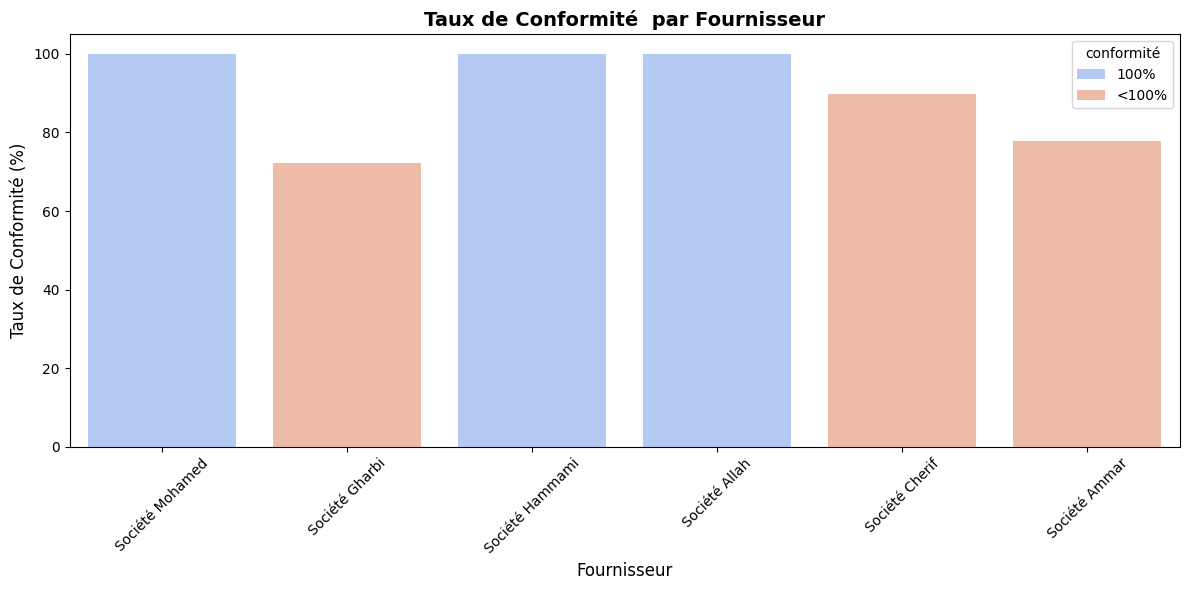

In [32]:
# Filtrer les fournisseurs et articles avec taux de conformité 100% ou inférieur
conformite_100 = achats[achats['Taux de conformité (%)'] == 100]
conformite_inferieur = achats[achats['Taux de conformité (%)'] < 100]

# Sélectionner un sous-ensemble (ex : 3 fournisseurs avec conformité 100% et 3 avec inférieur)
fournisseurs_100 = conformite_100['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux 100%
fournisseurs_inferieur = conformite_inferieur['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux < 100%

# Créer un sous-ensemble avec ces fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_100, fournisseurs_inferieur])

# Filtrer les données pour ne garder que ces fournisseurs
achats_filtrés = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Créer une nouvelle colonne pour définir les catégories 100% ou <100%
achats_filtrés['conformité'] = achats_filtrés['Taux de conformité (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Taux de conformité (%)', hue='conformité', data=achats_filtrés, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Conformité  par Fournisseur', fontsize=14, fontweight='bold')
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Taux de Conformité (%)', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\1420406845.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtrés['conformité'] = achats_filtrés['Taux de conformité (%)'].apply(


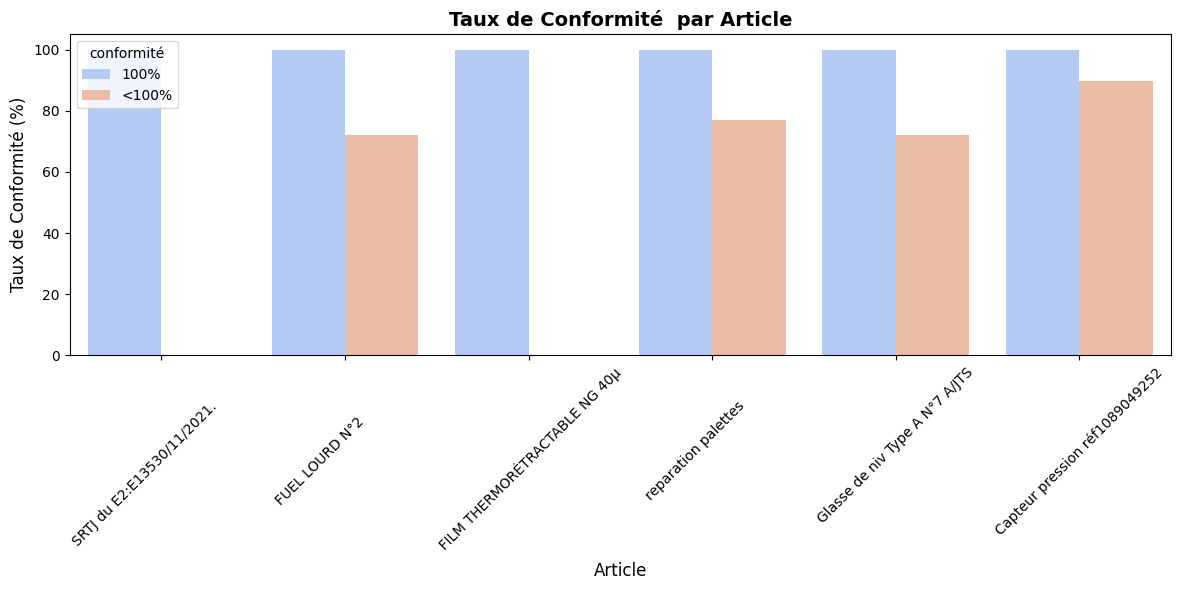

In [33]:

# Filtrer les fournisseurs et articles avec taux de conformité 100% ou inférieur
conformite_100 = achats[achats['Taux de conformité (%)'] == 100]
conformite_inferieur = achats[achats['Taux de conformité (%)'] < 100]

# Sélectionner un sous-ensemble (ex : 3 articles avec conformité 100% et 3 avec inférieur)
articles_100 = conformite_100['Article '].unique()[:3]  # 3 articles avec taux 100%
articles_inferieur = conformite_inferieur['Article '].unique()[:3]  # 3 articles avec taux < 100%

# Créer un sous-ensemble avec ces articles
articles_selectionnes = np.concatenate([articles_100, articles_inferieur])

# Filtrer les données pour ne garder que ces articles
achats_filtrés = achats[achats['Article '].isin(articles_selectionnes)]

# Créer une nouvelle colonne pour définir les catégories 100% ou <100%
achats_filtrés['conformité'] = achats_filtrés['Taux de conformité (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Article ', y='Taux de conformité (%)', hue='conformité', data=achats_filtrés, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Conformité  par Article', fontsize=14, fontweight='bold')
plt.xlabel('Article', fontsize=12)
plt.ylabel('Taux de Conformité (%)', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()








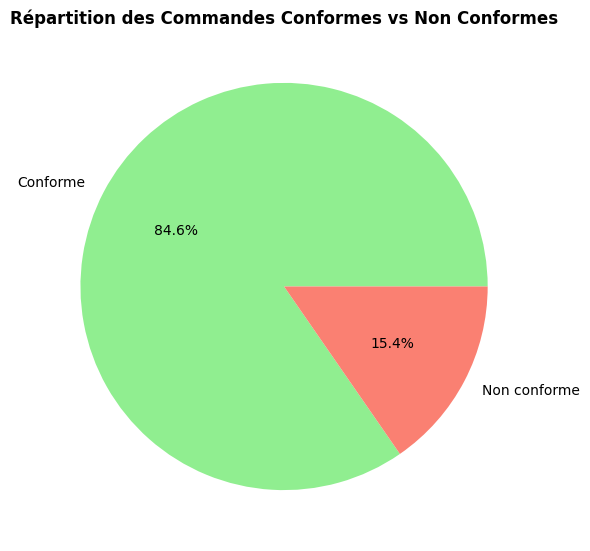

In [34]:
# Calculer le nombre de commandes conformes et non conformes
conforme_count = achats['conformité'].value_counts()

# Tracer un diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(conforme_count, labels=['Conforme', 'Non conforme'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Répartition des Commandes Conformes vs Non Conformes', fontweight='bold')
plt.tight_layout()
plt.show()

In [35]:
# Calcul de l'écart de délai
achats['Écart de délai'] = achats['durée de livraion'] - achats['délai de livraison']

In [36]:
achats.head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,...,durée de livraion,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse,quantité,Coût unitaire,Taux de conformité (%),Écart de délai
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,3081600,D051008,...,9,25,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,-16
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,...,16,8,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,...,25,4,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,21
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,...,12,3,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,9
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,...,6,8,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,-2


In [37]:
# Créer une nouvelle colonne pour indiquer si le délai est respecté (0 ou positif) ou en retard (négatif)
achats['Statut Livraison'] = np.where(achats['Écart de délai'] > 0, 'Retard', 'Respecté')

In [38]:
achats.head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,...,délai de livraison,conformité,Code Fournisseur,Nom Fournisseur,adresse,quantité,Coût unitaire,Taux de conformité (%),Écart de délai,Statut Livraison
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,3081600,D051008,...,25,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,-16,Respecté
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,...,8,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8,Retard
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,...,4,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,21,Retard
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,...,3,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,9,Retard
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,...,8,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,-2,Respecté


<Figure size 1200x600 with 0 Axes>

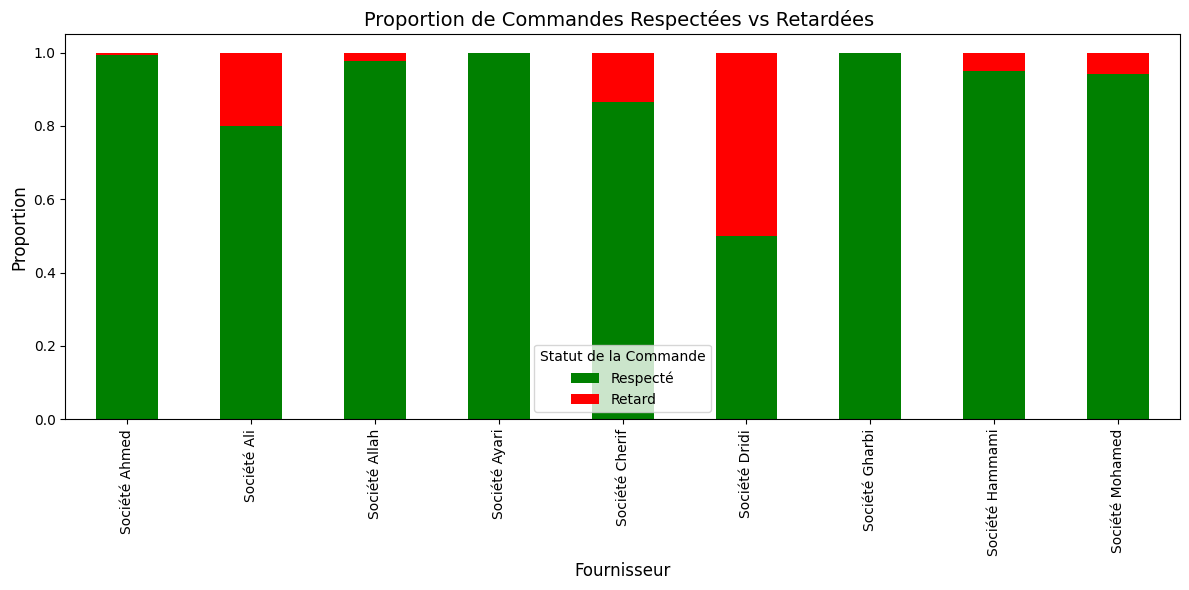

In [39]:


# Sélectionner quelques fournisseurs avec des retards et d'autres respectant les délais
fournisseurs_retard = achats[achats['Statut Livraison'] == 'Retard']['Nom Fournisseur'].unique()[:5]  # Sélectionner 5 fournisseurs en retard
fournisseurs_respecte = achats[achats['Statut Livraison'] == 'Respecté']['Nom Fournisseur'].unique()[:5]  # Sélectionner 5 fournisseurs respectés

# Combiner les deux sous-ensembles de fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_retard, fournisseurs_respecte])

# Filtrer les données pour ne garder que ces fournisseurs
achats_filtrés = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Calculer la proportion de respect / retard par fournisseur
status_proportion = achats_filtrés.groupby(['Nom Fournisseur', 'Statut Livraison']).size().unstack(fill_value=0)
status_proportion = status_proportion.div(status_proportion.sum(axis=1), axis=0)  # Normaliser

# Tracer le graphique à barres empilées
plt.figure(figsize=(12, 6))
status_proportion.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(12, 6))

# Ajouter un titre et des labels
plt.title('Proportion de Commandes Respectées vs Retardées ', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=90)

# Ajouter une légende
plt.legend(title='Statut de la Commande', labels=['Respecté', 'Retard'])

# Afficher le graphique
plt.tight_layout()
plt.show()



In [40]:
#nombre de commandes par fournisseur
commande_count_by_supplier = achats['Code Fournisseur'].value_counts().reset_index()
commande_count_by_supplier.columns = ['Code Fournisseur', 'Nombre de commandes']

achats = achats.merge(commande_count_by_supplier, on='Code Fournisseur', how='left')

In [41]:
achats.head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,...,conformité,Code Fournisseur,Nom Fournisseur,adresse,quantité,Coût unitaire,Taux de conformité (%),Écart de délai,Statut Livraison,Nombre de commandes
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,3081600,D051008,...,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,-16,Respecté,17
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,...,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8,Retard,8472
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,...,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,21,Retard,20
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,...,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,9,Retard,43
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,...,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,-2,Respecté,8472


In [42]:
# Fusionner les données pour récupérer le Nom Fournisseur
commande_count_by_supplier = pd.merge(commande_count_by_supplier, achats[['Code Fournisseur', 'Nom Fournisseur']].drop_duplicates(), on='Code Fournisseur', how='left')

# Vérifiez que 'Nom Fournisseur' a bien été ajouté
print(commande_count_by_supplier.head())


   Code Fournisseur  Nombre de commandes  Nom Fournisseur
0           5005182                 8472   Société Gharbi
1           5005839                 3229  Société Belhadj
2           5005138                  671     Société Nasr
3            550737                  581   Société Cherif
4           5008737                  410   Société Ayachi


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\125779846.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


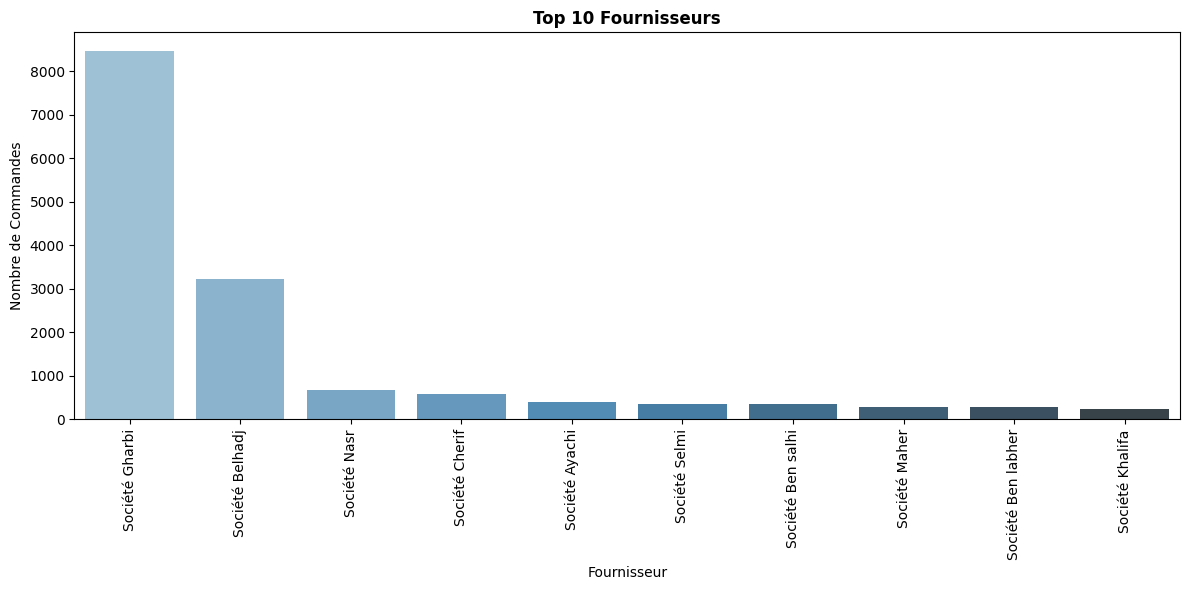

In [43]:
# Trier w sélectionner les 10 principaux fournisseurs par nombre de commandes
top_suppliers = commande_count_by_supplier.sort_values(by='Nombre de commandes', ascending=False).head(10)

# Tracer le diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Nom Fournisseur',
    y='Nombre de commandes',
    data=top_suppliers,
    palette='Blues_d'
)
plt.title('Top 10 Fournisseurs', fontweight='bold')
plt.xlabel('Fournisseur')
plt.ylabel('Nombre de Commandes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


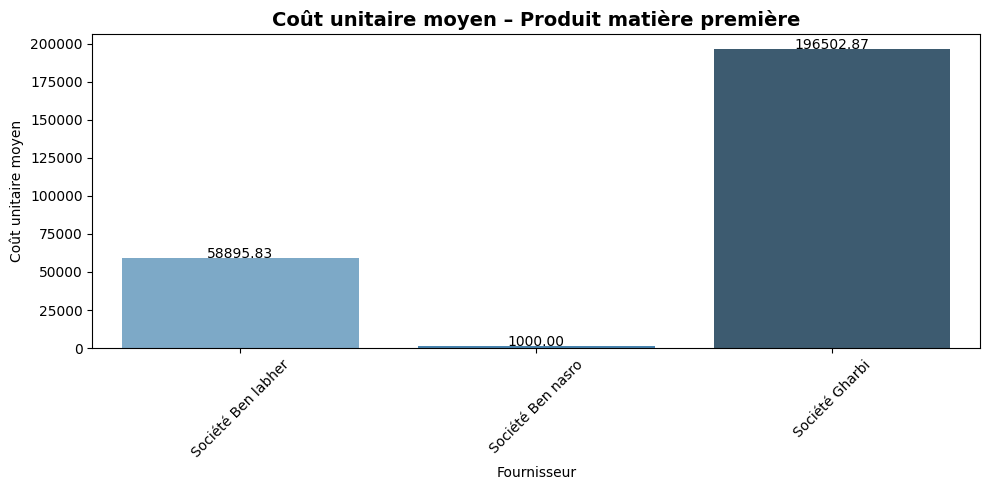

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


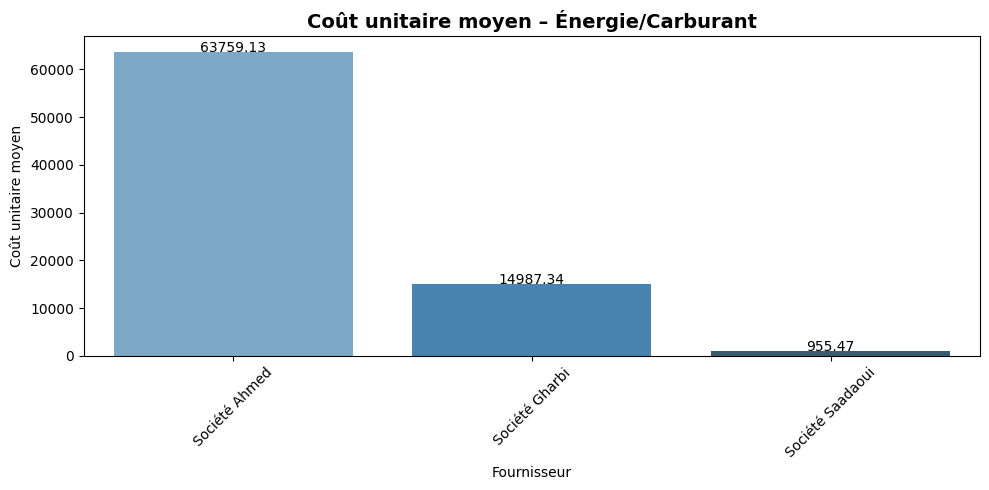

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


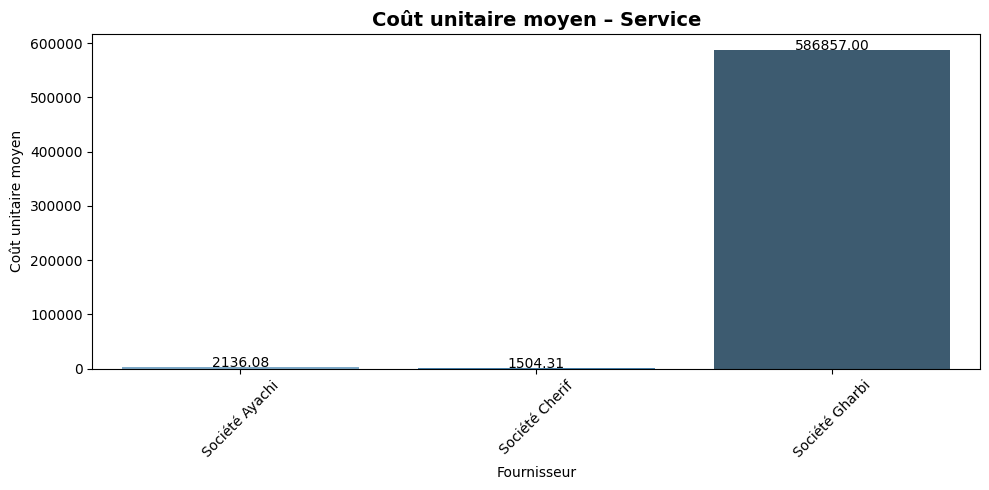

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


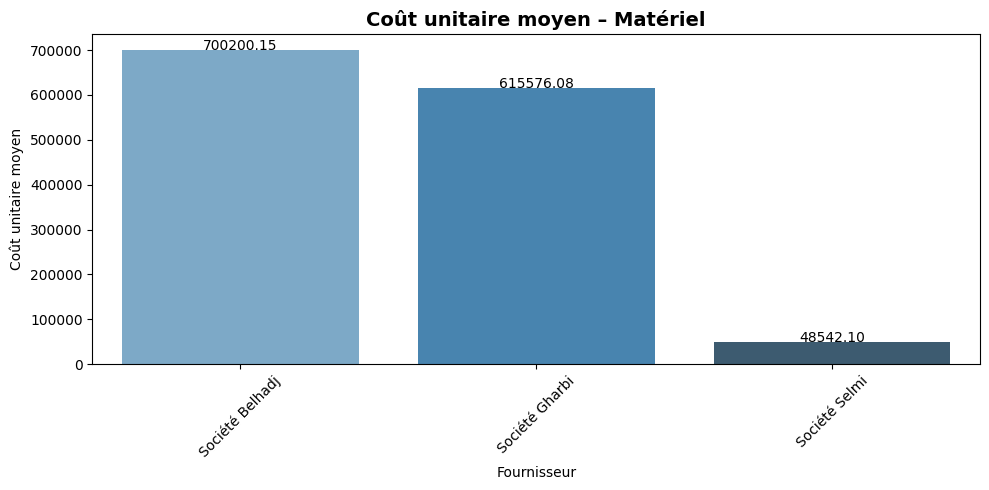

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


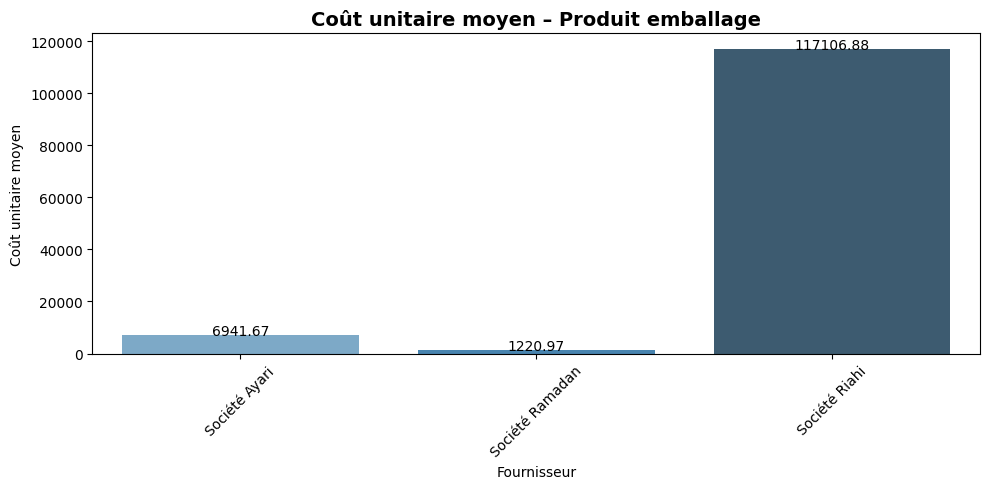

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


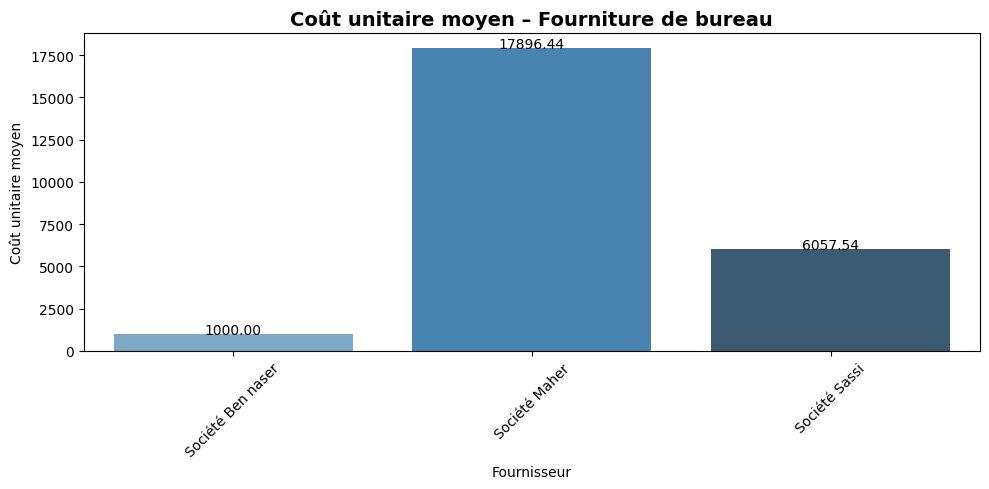

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


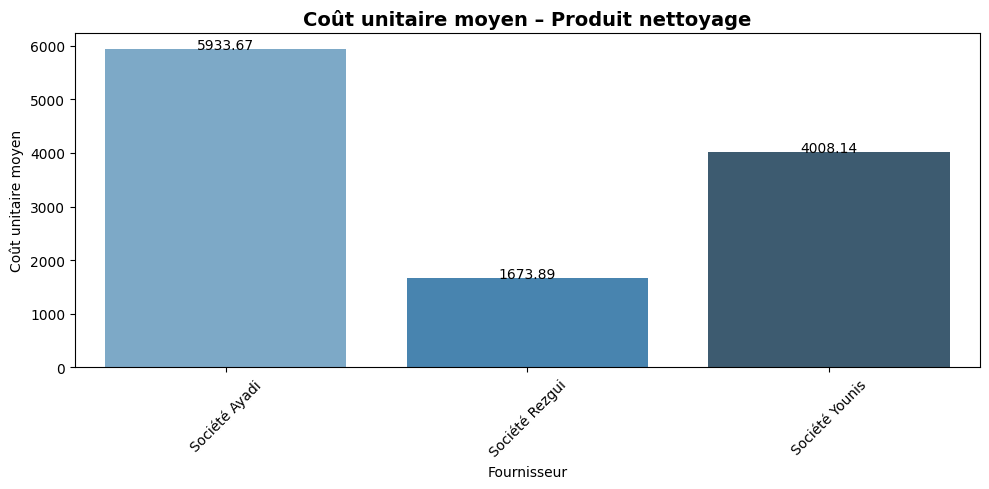

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


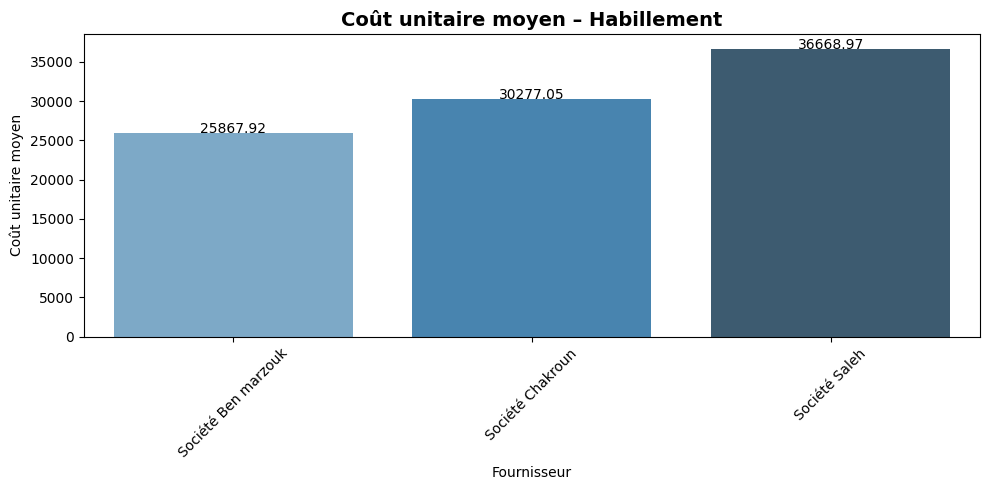

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données : uniquement conformes et coût > 0
achats_filtré = achats[(achats['conformité'] == 1) & (achats['Coût unitaire'] > 0)]

# Trouver les types d'articles uniques
types_articles = achats_filtré['Type article'].unique()

# Boucle sur chaque type d'article
for type_article in types_articles:
    # Filtrer les données pour ce type
    data_type = achats_filtré[achats_filtré['Type article'] == type_article]
    
    # Trouver les 3 fournisseurs les plus fréquents pour ce type
    top_suppliers = data_type['Nom Fournisseur'].value_counts().head(3).index
    
    # Filtrer sur ces top fournisseurs
    data_type = data_type[data_type['Nom Fournisseur'].isin(top_suppliers)]
    
    # Calculer le coût unitaire moyen
    cost_by_supplier = data_type.groupby('Nom Fournisseur')['Coût unitaire'].mean().reset_index()
    
    # Tracer le graphe
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(
        data=cost_by_supplier,
        x='Nom Fournisseur',
        y='Coût unitaire',
        palette='Blues_d'
    )
    
    # Ajouter les valeurs exactes sur les barres
    for i, v in enumerate(cost_by_supplier['Coût unitaire']):
        ax.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)
    
    # Mise en forme
    plt.title(f"Coût unitaire moyen – {type_article}", fontsize=14, fontweight='bold')
    plt.xlabel('Fournisseur')
    plt.ylabel('Coût unitaire moyen')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()





C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\3327084496.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nom Fournisseur', y='Coût unitaire', data=cost_per_unit_by_supplier, palette='viridis')


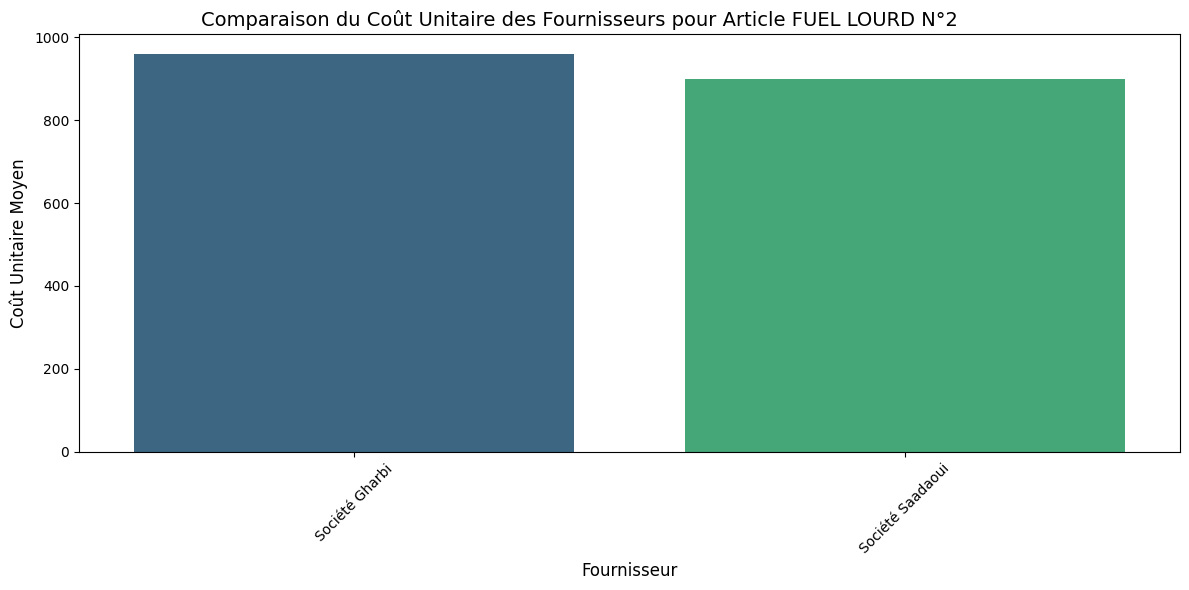

In [45]:
# Sélectionner un article spécifique (par exemple, l'article le plus fréquent)
article_specific = achats['Article '].mode()[0]  # Prend l'article le plus fréquent dans les données

# Filtrer les données pour cet article spécifique
article_data = achats[achats['Article '] == article_specific]

# Calculer le coût unitaire moyen par fournisseur pour cet article
cost_per_unit_by_supplier = article_data.groupby('Nom Fournisseur')['Coût unitaire'].mean().reset_index()

# Tracer un graphique en barres pour comparer les fournisseurs
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Coût unitaire', data=cost_per_unit_by_supplier, palette='viridis')

# Ajouter un titre et des labels
plt.title(f'Comparaison du Coût Unitaire des Fournisseurs pour Article {article_specific}', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Coût Unitaire Moyen', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()







In [46]:
achats.columns

Index(['Société', 'N°commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantité', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date réception', 'durée de livraion',
       'délai de livraison', 'conformité', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'quantité', 'Coût unitaire',
       'Taux de conformité (%)', 'Écart de délai', 'Statut Livraison',
       'Nombre de commandes'],
      dtype='object')

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\1213685957.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nom Fournisseur', y='quantité', data=top_suppliers_quantity, palette="Blues_d")


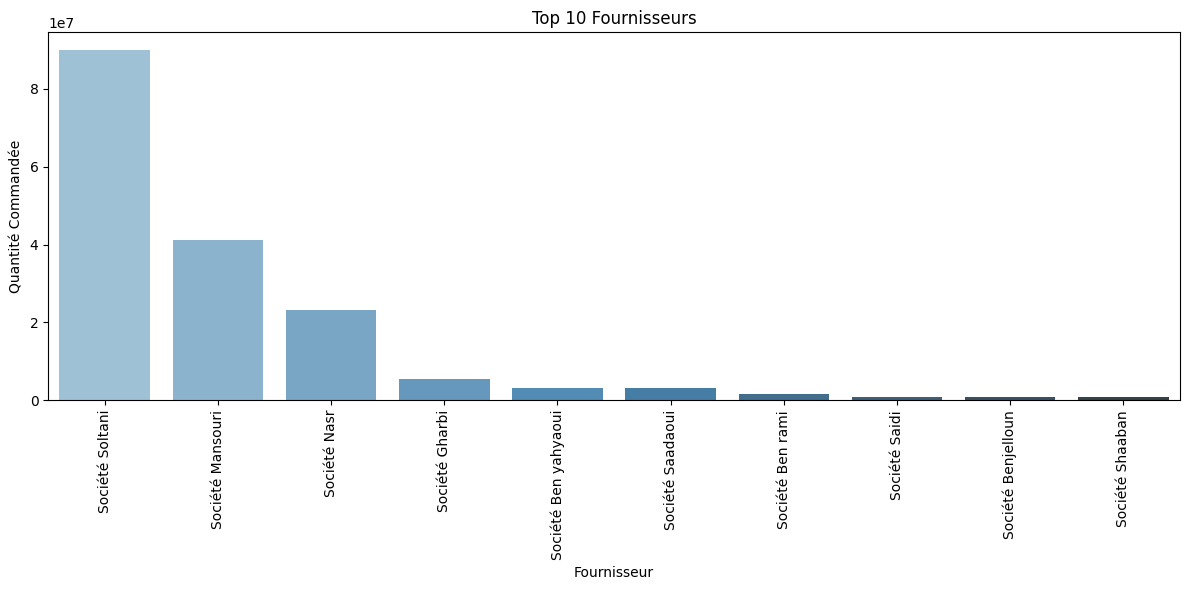

In [47]:
# Sélectionner les 10 principaux fournisseurs par quantité
top_suppliers_quantity = achats.groupby('Nom Fournisseur')['quantité'].sum().reset_index()
top_suppliers_quantity = top_suppliers_quantity.sort_values(by='quantité', ascending=False).head(10)

# Tracer un diagramme en barres avec Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='quantité', data=top_suppliers_quantity, palette="Blues_d")
plt.title('Top 10 Fournisseurs')
plt.xlabel('Fournisseur')
plt.ylabel('Quantité Commandée')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\2809180874.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=commandes_par_type, x="Type article", y="Nombre de commandes", palette="Blues_d")


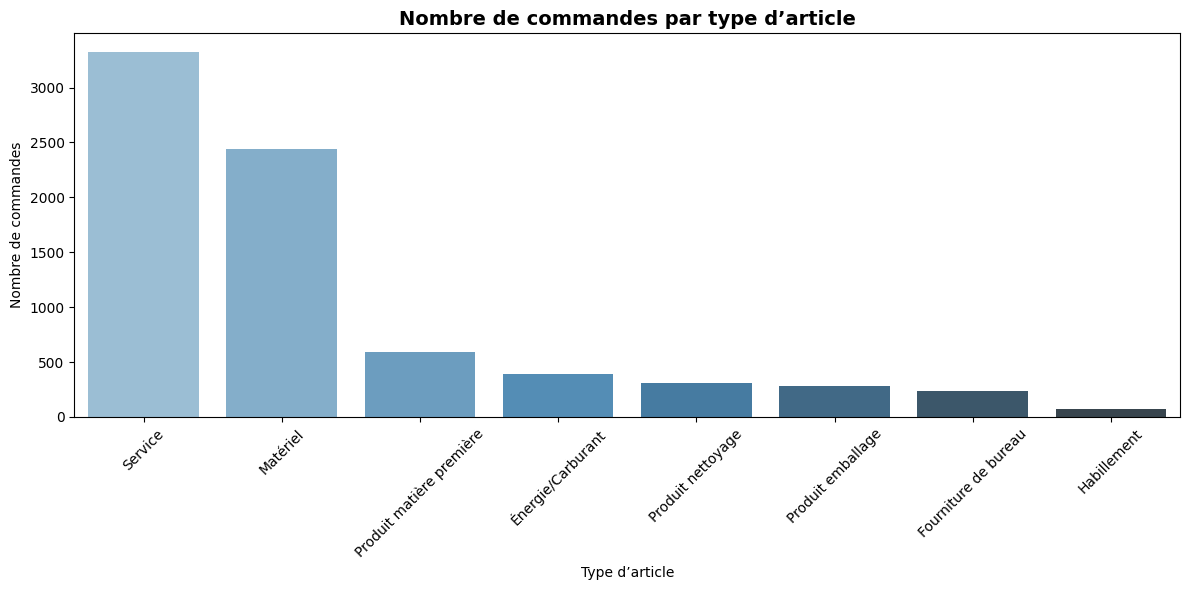

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de DataFrame (remplace ça par ton vrai DataFrame "achats")
# achats = pd.read_csv('ton_fichier.csv')

# Supposons que tu as une colonne "Type article" et une colonne "N°commande" ou équivalent
# Groupement pour obtenir le nombre de commandes par type d'article
commandes_par_type = achats.groupby("Type article")["N°commande"].nunique().reset_index()
commandes_par_type.columns = ["Type article", "Nombre de commandes"]

# Tri pour une meilleure lecture
commandes_par_type = commandes_par_type.sort_values(by="Nombre de commandes", ascending=False)

# Création du graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=commandes_par_type, x="Type article", y="Nombre de commandes", palette="Blues_d")

# Ajout des étiquettes
plt.title("Nombre de commandes par type d’article", fontsize=14, weight='bold')
plt.xlabel("Type d’article")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
achats.head()

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,...,conformité,Code Fournisseur,Nom Fournisseur,adresse,quantité,Coût unitaire,Taux de conformité (%),Écart de délai,Statut Livraison,Nombre de commandes
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,3081600,D051008,...,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,-16,Respecté,17
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,...,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8,Retard,8472
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,...,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,21,Retard,20
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,...,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,9,Retard,43
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,...,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,-2,Respecté,8472


In [50]:
# Convertir 'Statut Livraison' en valeur numérique
achats['Respect_délais'] = (achats['Statut Livraison'] == 'Respecté').astype(int)

# Vérification rapide
print(achats[['Statut Livraison', 'Respect_délais']].head())

  Statut Livraison  Respect_délais
0         Respecté               1
1           Retard               0
2           Retard               0
3           Retard               0
4         Respecté               1


In [51]:
 # Calcul du Taux de Respect des Délais par fournisseur
taux_respect = achats.groupby('Nom Fournisseur').apply(
    lambda x: (x['Statut Livraison'] == 'Respecté').mean() * 100
).reset_index(name='Taux de Respect (%)')

# Fusionner avec le DataFrame principal 
achats = achats.merge(taux_respect, on='Nom Fournisseur', how='left')

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\1915269878.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  taux_respect = achats.groupby('Nom Fournisseur').apply(


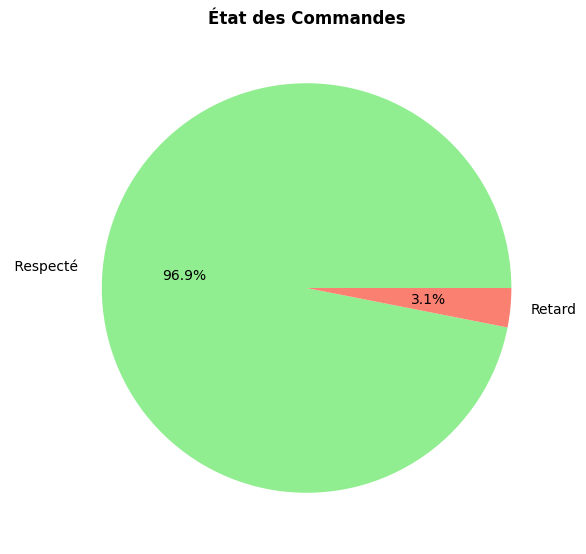

In [52]:
# Calculer le nombre de commandes conformes et non conformes
conforme_count = achats['Respect_délais'].value_counts()

# Tracer un diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(conforme_count, labels=[' Respecté ', 'Retard'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('État des Commandes', weight='bold')
plt.tight_layout()
plt.show()

In [53]:
achats

,Société,N°commande,Type commande,Code article,Article,Type article,Quantité,UM,Montant,Centre de cout,...,Nom Fournisseur,adresse,quantité,Coût unitaire,Taux de conformité (%),Écart de délai,Statut Livraison,Nombre de commandes,Respect_délais,Taux de Respect (%)
0,5,22000002,HS,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,3081600,D051008,...,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,-16,Respecté,17,1,94.117647
1,5,22000002,OR,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,22276389,PR510,...,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8,Retard,8472,0,99.940982
2,5,22000003,AC,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,351000000,MP510,...,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,21,Retard,20,0,95.000000
3,5,22000003,HS,HSDLI007,reparation palettes,Service,3402.0,UN,10206000,D0510055,...,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,9,Retard,43,0,97.674419
4,5,22000003,OR,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2054800,PR510,...,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,-2,Respecté,8472,1,99.940982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,5,24900731,OR,HSCLN0015,frais de participation,Service,2.0,PI,1344538,D051008,...,Société Ben Mabrouk,Sidi Bouzid,2.0,6.722690e+05,100.000000,-18,Respecté,215,1,100.000000
23079,5,24900731,OR,HSCLN0015,hebergement,Service,2.0,PI,280374,D051008,...,Société Ben Mabrouk,Kasserine,2.0,1.401870e+05,100.000000,-18,Respecté,215,1,100.000000
23080,5,24900732,OR,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,873000,D051008,...,Société Ben Mabrouk,Bizerte,1.0,8.730000e+05,100.000000,-18,Respecté,215,1,100.000000
23081,5,24900733,OR,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,1000,D051007,...,Société Ben naser,Kasserine,1.0,1.000000e+03,100.000000,-43,Respecté,192,1,97.916667


In [54]:
achats.columns

Index(['Société', 'N°commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantité', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date réception', 'durée de livraion',
       'délai de livraison', 'conformité', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'quantité', 'Coût unitaire',
       'Taux de conformité (%)', 'Écart de délai', 'Statut Livraison',
       'Nombre de commandes', 'Respect_délais', 'Taux de Respect (%)'],
      dtype='object')

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\1397843888.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtrés['conformité'] = achats_filtrés['Taux de Respect (%)'].apply(


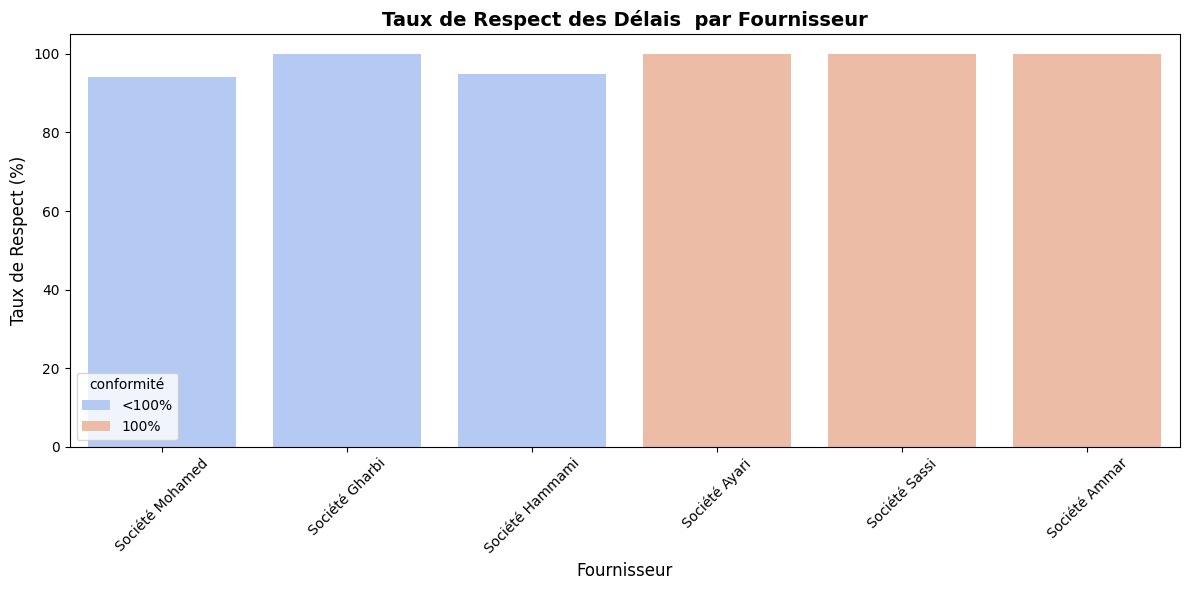

In [55]:
# Filtrer les fournisseurs et articles avec taux de conformité 100% ou inférieur
conformite_100 = achats[achats['Taux de Respect (%)'] == 100]
conformite_inferieur = achats[achats['Taux de Respect (%)'] < 100]

# Sélectionner un sous-ensemble (ex : 3 fournisseurs avec conformité 100% et 3 avec inférieur)
fournisseurs_100 = conformite_100['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux 100%
fournisseurs_inferieur = conformite_inferieur['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux < 100%

# Créer un sous-ensemble avec ces fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_100, fournisseurs_inferieur])

# Filtrer les données pour ne garder que ces fournisseurs
achats_filtrés = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Créer une nouvelle colonne pour définir les catégories 100% ou <100%
achats_filtrés['conformité'] = achats_filtrés['Taux de Respect (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Taux de Respect (%)', hue='conformité', data=achats_filtrés, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Respect des Délais  par Fournisseur', fontsize=14, weight='bold')
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Taux de Respect (%)', fontsize=12)

# Rotation des labels pour la lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [56]:
achats.columns

Index(['Société', 'N°commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantité', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date réception', 'durée de livraion',
       'délai de livraison', 'conformité', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'quantité', 'Coût unitaire',
       'Taux de conformité (%)', 'Écart de délai', 'Statut Livraison',
       'Nombre de commandes', 'Respect_délais', 'Taux de Respect (%)'],
      dtype='object')

In [57]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Montant', 'délai de livraison',  'Statut Livraison','Écart de délai', 'Société','Centre de cout','Type commande','durée de livraion']

# Suppression des colonnes
achats = achats.drop(columns=colonnes_a_supprimer)

In [58]:
achats

,N°commande,Code article,Article,Type article,Quantité,UM,Date commande,Date réception,conformité,Code Fournisseur,Nom Fournisseur,adresse,quantité,Coût unitaire,Taux de conformité (%),Nombre de commandes,Respect_délais,Taux de Respect (%)
0,22000002,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,2022-01-03,2022-01-12,1,5006997,Société Mohamed,Gafsa,1.0,3.081600e+06,100.000000,17,1,94.117647
1,22000002,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,2022-01-04,2022-01-20,1,5005182,Société Gharbi,Nabeul,30000.0,7.425463e+02,72.143532,8472,0,99.940982
2,22000003,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,2022-01-05,2022-01-30,1,5006889,Société Hammami,Tataouine,45000.0,7.800000e+03,100.000000,20,0,95.000000
3,22000003,HSDLI007,reparation palettes,Service,3402.0,UN,2022-01-03,2022-01-15,1,5007369,Société Allah,Jendouba,3402.0,3.000000e+03,100.000000,43,0,97.674419
4,22000003,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2022-01-04,2022-01-10,1,5005182,Société Gharbi,Gabès,2.0,1.027400e+06,72.143532,8472,1,99.940982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,24900731,HSCLN0015,frais de participation,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,Société Ben Mabrouk,Sidi Bouzid,2.0,6.722690e+05,100.000000,215,1,100.000000
23079,24900731,HSCLN0015,hebergement,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,Société Ben Mabrouk,Kasserine,2.0,1.401870e+05,100.000000,215,1,100.000000
23080,24900732,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,2024-10-24,2024-10-31,1,559911,Société Ben Mabrouk,Bizerte,1.0,8.730000e+05,100.000000,215,1,100.000000
23081,24900733,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,2024-10-24,2024-10-31,1,550645,Société Ben naser,Kasserine,1.0,1.000000e+03,100.000000,192,1,97.916667


In [59]:
# Définition des pondérations
w1, w2, w3, w4 = 0.4, 0.3, 0.2, 0.1  

In [60]:
# Normalisation du coût unitaire 
achats["Coût unitaire normalisé"] = 1 / (achats["Coût unitaire"] + 1)  # Ajout de +1 pour éviter l'infini
achats["Nombre commandes normalisé"] = achats["Nombre de commandes"] / achats["Nombre de commandes"].max()

In [61]:
# Calcul du score (normalisé entre 0 et 10)
achats["Score"] = 10 * (
    w1 * achats["Taux de conformité (%)"] / 100 +
    w2 * achats["Taux de Respect (%)"] / 100 +
    w3 * achats["Coût unitaire normalisé"] +
    w4 * achats["Nombre commandes normalisé"]
)

In [62]:
# Fonction de catégorisation
def categoriser(score):
    if score >= 8:
        return "Très Fiable"
    elif 5 <= score < 8:
        return "Moyen"
    else:
        return "Risqué"

# Appliquer la catégorisation
achats["Catégorie"] = achats["Score"].apply(categoriser)

# Afficher les résultats
achats[["Nom Fournisseur", "Score", "Catégorie"]].head(9)

,Nom Fournisseur,Score,Catégorie
0,Société Mohamed,6.825537,Moyen
1,Société Gharbi,6.886661,Moyen
2,Société Hammami,6.852617,Moyen
3,Société Allah,6.935975,Moyen
4,Société Gharbi,6.883973,Moyen
5,Société Ali,6.401500,Moyen
6,Société Dridi,5.500241,Moyen
7,Société Cherif,8.254465,Très Fiable
8,Société Ayari,7.001739,Moyen


In [63]:

# Afficher uniquement les fournisseurs "Risqué"
print(achats[achats["Catégorie"] == "Risqué"][["Nom Fournisseur", "Score","Catégorie"]])

            Nom Fournisseur     Score Catégorie
161           Société Saeed  4.322519    Risqué
1207          Société Saeed  4.322519    Risqué
1311          Société Saeed  4.322518    Risqué
1563           Société Amin  4.274074    Risqué
1564           Société Amin  4.274064    Risqué
...                     ...       ...       ...
20801  Société Ben boubaker  4.000119    Risqué
20929  Société Ben Mansouri  4.000119    Risqué
20952   Société Ben mansour  4.000118    Risqué
21573     Société Ben saber  4.000121    Risqué
21575         Société Saeed  4.322540    Risqué

[108 rows x 3 columns]


In [64]:
achats

,N°commande,Code article,Article,Type article,Quantité,UM,Date commande,Date réception,conformité,Code Fournisseur,...,quantité,Coût unitaire,Taux de conformité (%),Nombre de commandes,Respect_délais,Taux de Respect (%),Coût unitaire normalisé,Nombre commandes normalisé,Score,Catégorie
0,22000002,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,2022-01-03,2022-01-12,1,5006997,...,1.0,3.081600e+06,100.000000,17,1,94.117647,3.245066e-07,0.002007,6.825537,Moyen
1,22000002,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,2022-01-04,2022-01-20,1,5005182,...,30000.0,7.425463e+02,72.143532,8472,0,99.940982,1.344906e-03,1.000000,6.886661,Moyen
2,22000003,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,2022-01-05,2022-01-30,1,5006889,...,45000.0,7.800000e+03,100.000000,20,0,95.000000,1.281887e-04,0.002361,6.852617,Moyen
3,22000003,HSDLI007,reparation palettes,Service,3402.0,UN,2022-01-03,2022-01-15,1,5007369,...,3402.0,3.000000e+03,100.000000,43,0,97.674419,3.332223e-04,0.005076,6.935975,Moyen
4,22000003,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2022-01-04,2022-01-10,1,5005182,...,2.0,1.027400e+06,72.143532,8472,1,99.940982,9.733298e-07,1.000000,6.883973,Moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,24900731,HSCLN0015,frais de participation,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,2.0,6.722690e+05,100.000000,215,1,100.000000,1.487498e-06,0.025378,7.025381,Moyen
23079,24900731,HSCLN0015,hebergement,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,2.0,1.401870e+05,100.000000,215,1,100.000000,7.133278e-06,0.025378,7.025392,Moyen
23080,24900732,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,2024-10-24,2024-10-31,1,559911,...,1.0,8.730000e+05,100.000000,215,1,100.000000,1.145474e-06,0.025378,7.025380,Moyen
23081,24900733,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,2024-10-24,2024-10-31,1,550645,...,1.0,1.000000e+03,100.000000,192,1,97.916667,9.990010e-04,0.022663,6.962161,Moyen


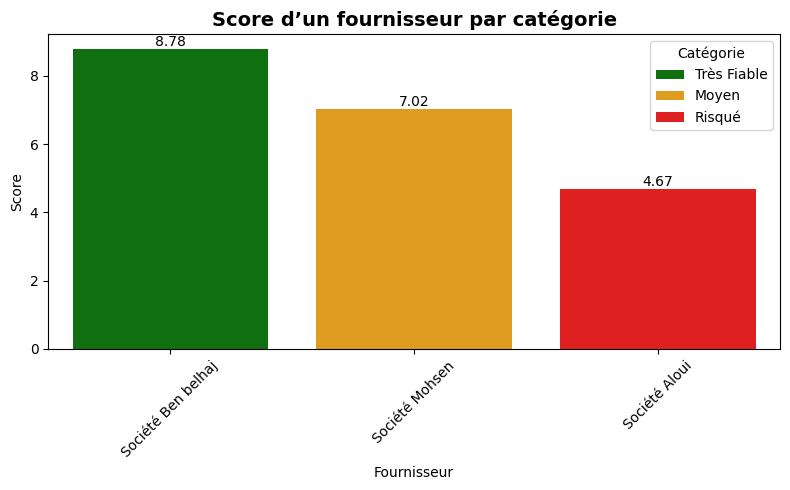

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sélectionner 1 fournisseur par catégorie (sans doublons)
f1 = achats[achats['Catégorie'] == 'Très Fiable'].drop_duplicates('Nom Fournisseur').sample(n=1, random_state=1)
f2 = achats[achats['Catégorie'] == 'Moyen'].drop_duplicates('Nom Fournisseur').sample(n=1, random_state=1)
f3 = achats[achats['Catégorie'] == 'Risqué'].drop_duplicates('Nom Fournisseur').sample(n=1, random_state=1)

# Combiner les 3 fournisseurs
fournisseurs_selectionnes = pd.concat([f1, f2, f3])

# Graphique
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=fournisseurs_selectionnes, 
    x='Nom Fournisseur', 
    y='Score', 
    hue='Catégorie', 
    palette={'Très Fiable': 'green', 'Moyen': 'orange', 'Risqué': 'red'}
)

# Ajouter les scores sur les barres
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10
        )

# Mise en forme
plt.title("Score d’un fournisseur par catégorie", fontsize=14, weight='bold')
plt.xlabel("Fournisseur")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Catégorie")
plt.tight_layout()
plt.show()


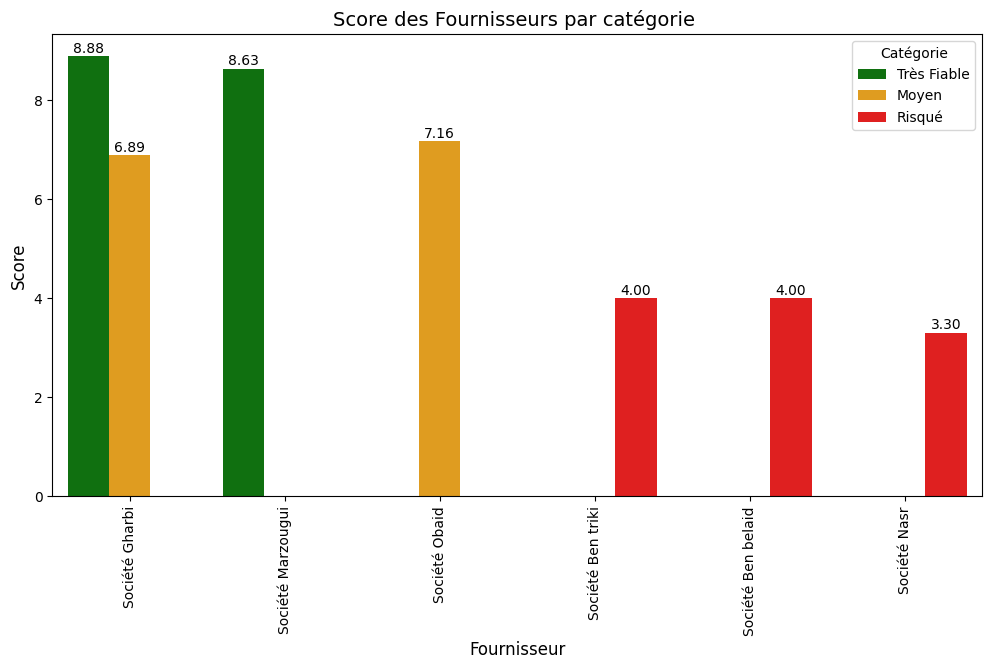

In [66]:
# Sélectionner un sous-ensemble de 3 fournisseurs par catégorie
fournisseurs_tres_fiable = achats[achats['Catégorie'] == 'Très Fiable'].sample(n=3, random_state=1)
fournisseurs_moyen = achats[achats['Catégorie'] == 'Moyen'].sample(n=3, random_state=1)
fournisseurs_risque = achats[achats['Catégorie'] == 'Risqué'].sample(n=3, random_state=1)

# Combiner les sous-ensembles
fournisseurs_selectionnes = pd.concat([fournisseurs_tres_fiable, fournisseurs_moyen, fournisseurs_risque])

# Graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=fournisseurs_selectionnes, 
            x='Nom Fournisseur', 
            y='Score', 
            hue='Catégorie', 
            palette=['green', 'orange', 'red'])  # Utilisation d'une palette pour les 3 catégories

# Ajouter un titre et des labels
plt.title("Score des Fournisseurs par catégorie ", fontsize=14)
plt.xlabel("Fournisseur", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Rotation des étiquettes de l'axe x
plt.xticks(rotation=90)

# Affichage de la légende
plt.legend(title="Catégorie")

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 0.01,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Afficher le graphique
plt.show()


In [67]:
achats

,N°commande,Code article,Article,Type article,Quantité,UM,Date commande,Date réception,conformité,Code Fournisseur,...,quantité,Coût unitaire,Taux de conformité (%),Nombre de commandes,Respect_délais,Taux de Respect (%),Coût unitaire normalisé,Nombre commandes normalisé,Score,Catégorie
0,22000002,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,2022-01-03,2022-01-12,1,5006997,...,1.0,3.081600e+06,100.000000,17,1,94.117647,3.245066e-07,0.002007,6.825537,Moyen
1,22000002,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,2022-01-04,2022-01-20,1,5005182,...,30000.0,7.425463e+02,72.143532,8472,0,99.940982,1.344906e-03,1.000000,6.886661,Moyen
2,22000003,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,2022-01-05,2022-01-30,1,5006889,...,45000.0,7.800000e+03,100.000000,20,0,95.000000,1.281887e-04,0.002361,6.852617,Moyen
3,22000003,HSDLI007,reparation palettes,Service,3402.0,UN,2022-01-03,2022-01-15,1,5007369,...,3402.0,3.000000e+03,100.000000,43,0,97.674419,3.332223e-04,0.005076,6.935975,Moyen
4,22000003,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2022-01-04,2022-01-10,1,5005182,...,2.0,1.027400e+06,72.143532,8472,1,99.940982,9.733298e-07,1.000000,6.883973,Moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,24900731,HSCLN0015,frais de participation,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,2.0,6.722690e+05,100.000000,215,1,100.000000,1.487498e-06,0.025378,7.025381,Moyen
23079,24900731,HSCLN0015,hebergement,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,2.0,1.401870e+05,100.000000,215,1,100.000000,7.133278e-06,0.025378,7.025392,Moyen
23080,24900732,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,2024-10-24,2024-10-31,1,559911,...,1.0,8.730000e+05,100.000000,215,1,100.000000,1.145474e-06,0.025378,7.025380,Moyen
23081,24900733,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,2024-10-24,2024-10-31,1,550645,...,1.0,1.000000e+03,100.000000,192,1,97.916667,9.990010e-04,0.022663,6.962161,Moyen


In [68]:
# Par type d'article, estimer le nombre de jours moyens entre 2 commandes
df_sorted = achats.sort_values(['Type article', 'Date commande'])

df_sorted['prev_date'] = df_sorted.groupby('Type article')['Date commande'].shift(1)
df_sorted['diff_days'] = (df_sorted['Date commande'] - df_sorted['prev_date']).dt.days

# Moyenne d'intervalle par type d'article
horizons = df_sorted.groupby('Type article')['diff_days'].mean().dropna()

# Exemple résultat
print(horizons)
# Produit emballage: 30 → horizon = 6 mois
# Service: 15 → horizon = 3 mois
# Énergie/Carburant: 90 → horizon = 12 mois


Type article
Fourniture de bureau        2.273305
Habillement                 3.429487
Matériel                    0.074880
Produit emballage           2.590909
Produit matière première    1.101420
Produit nettoyage           2.387665
Service                     0.209758
Énergie/Carburant           1.771475
Name: diff_days, dtype: float64


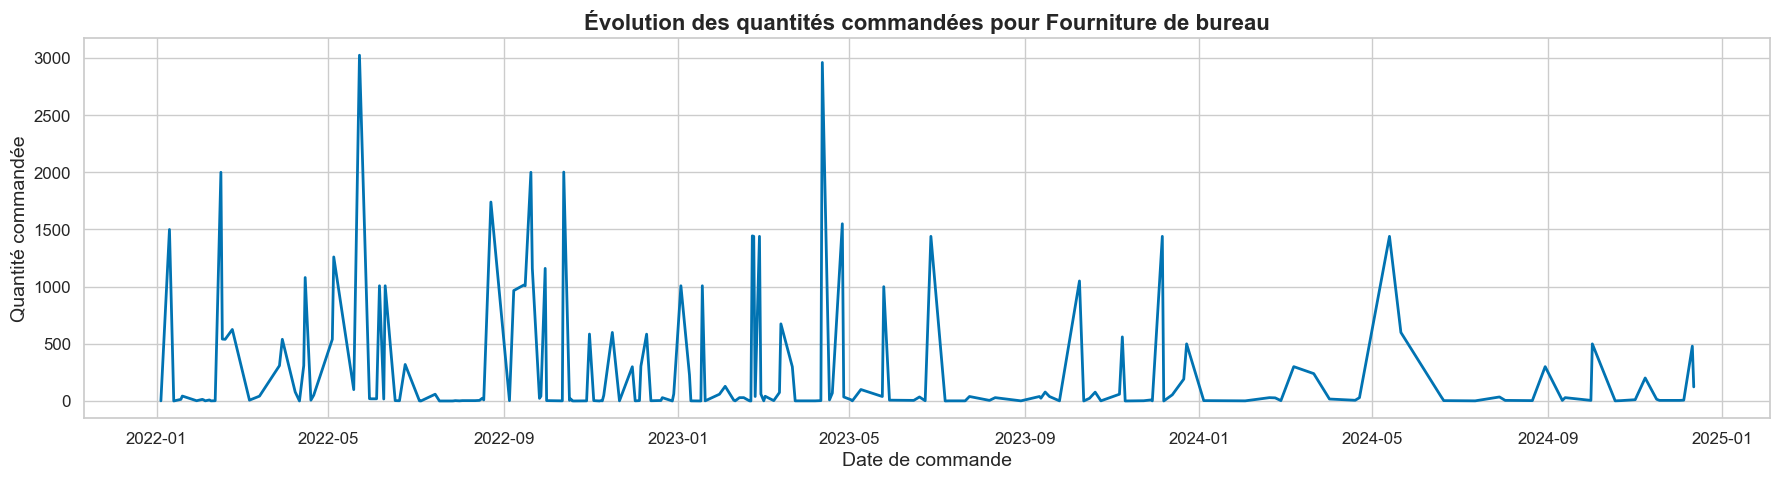

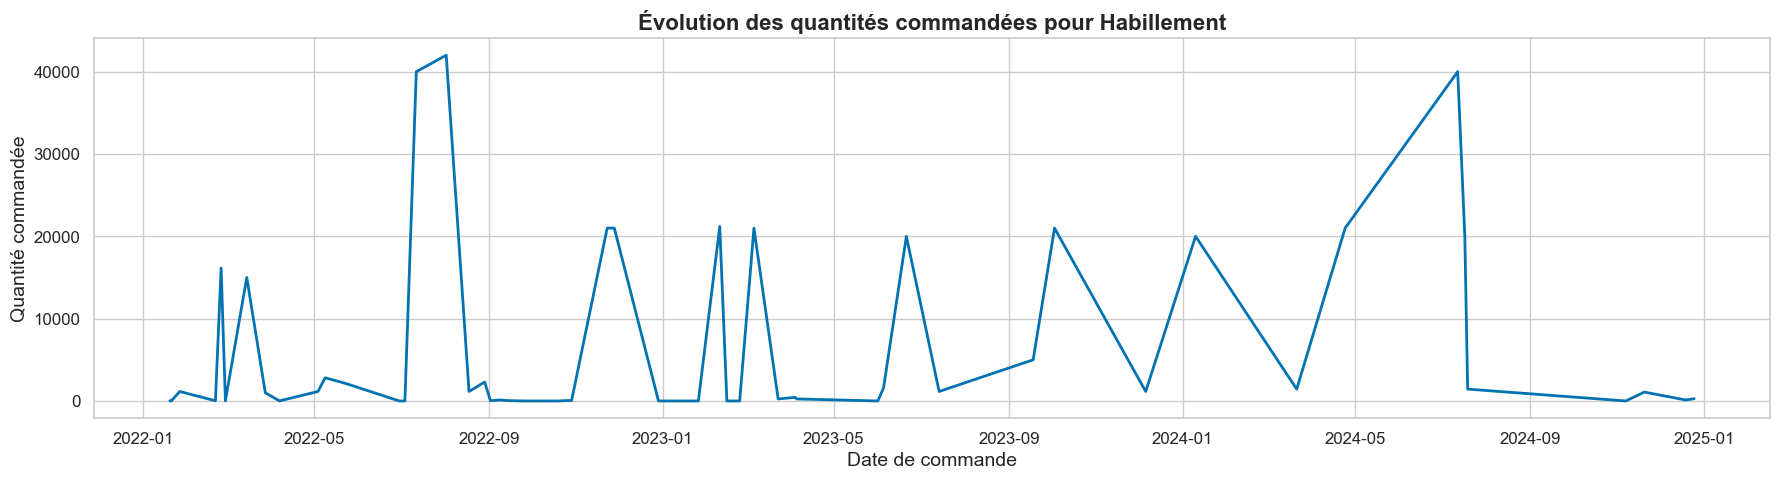

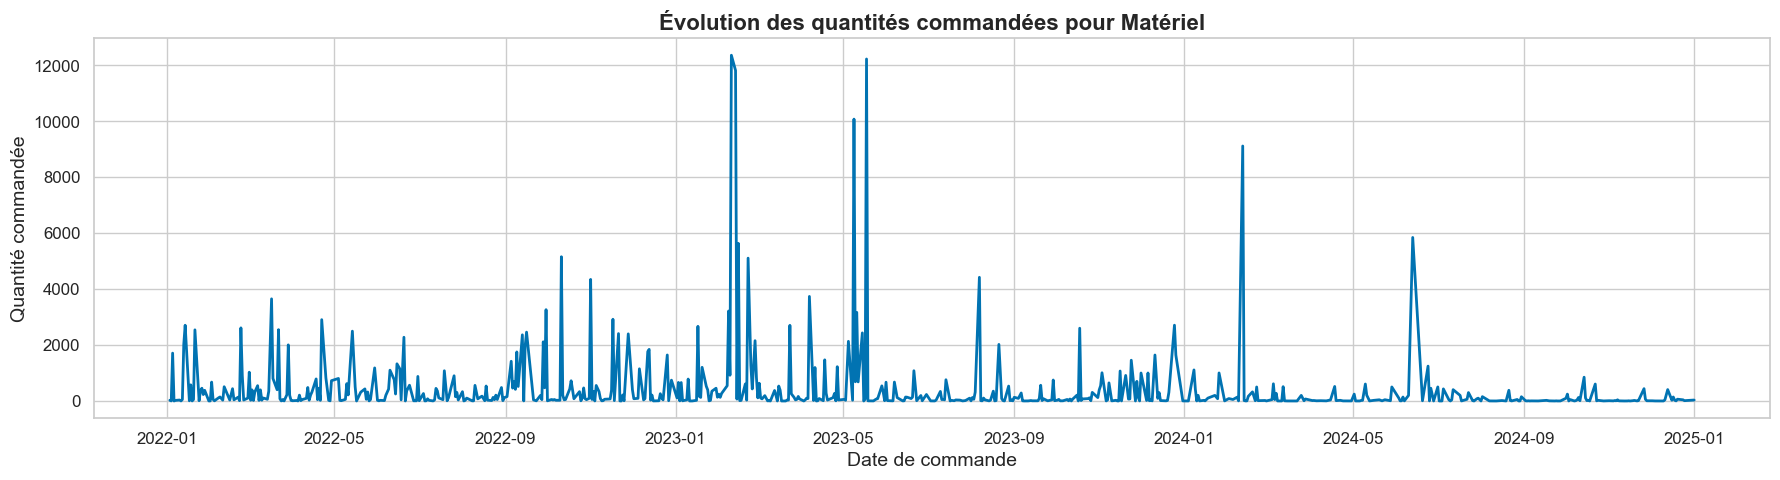

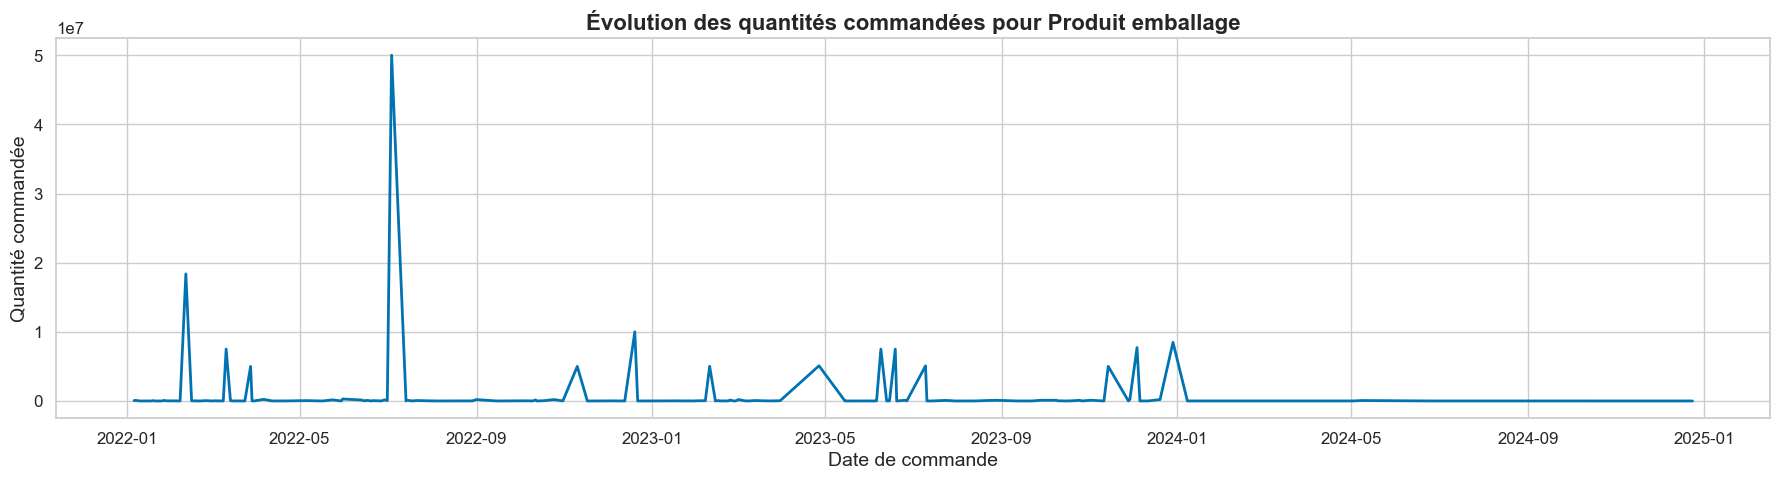

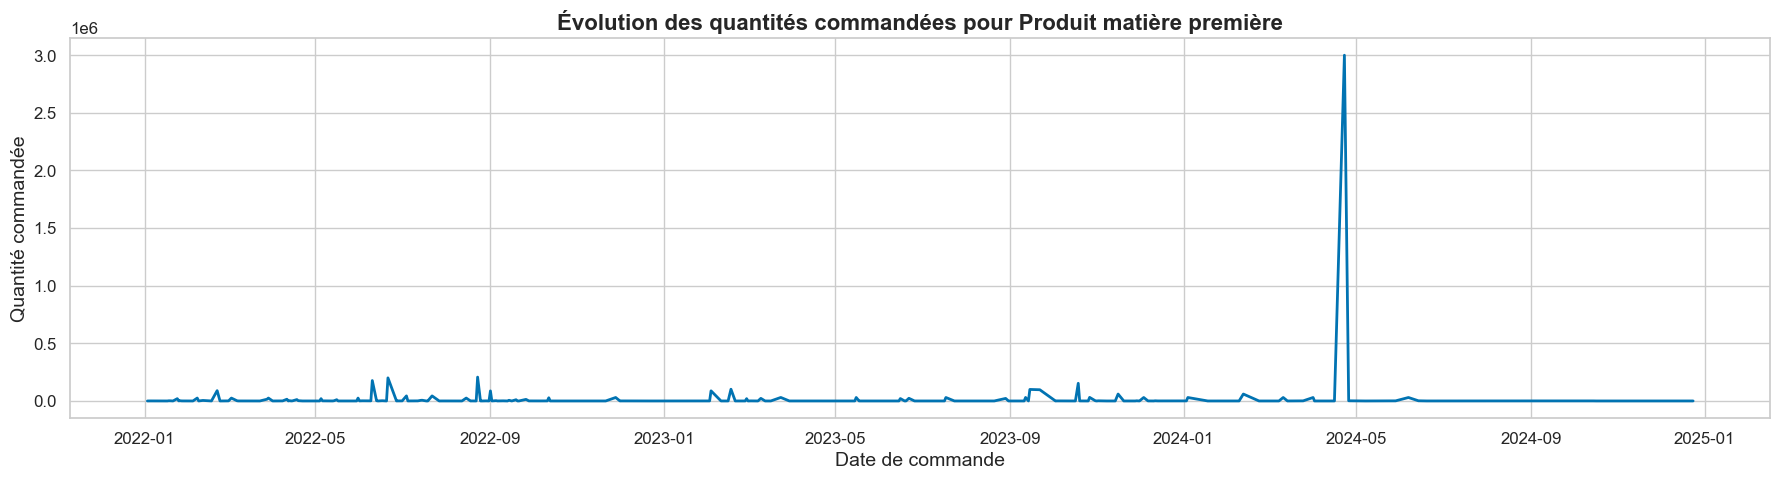

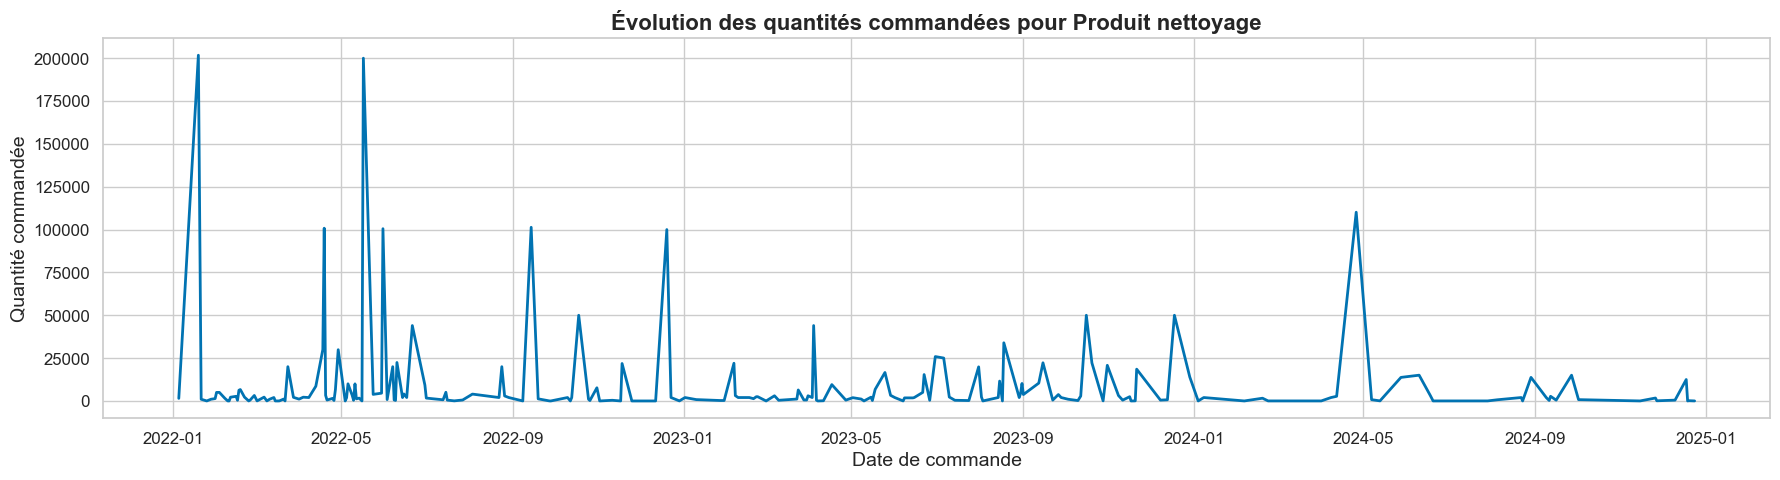

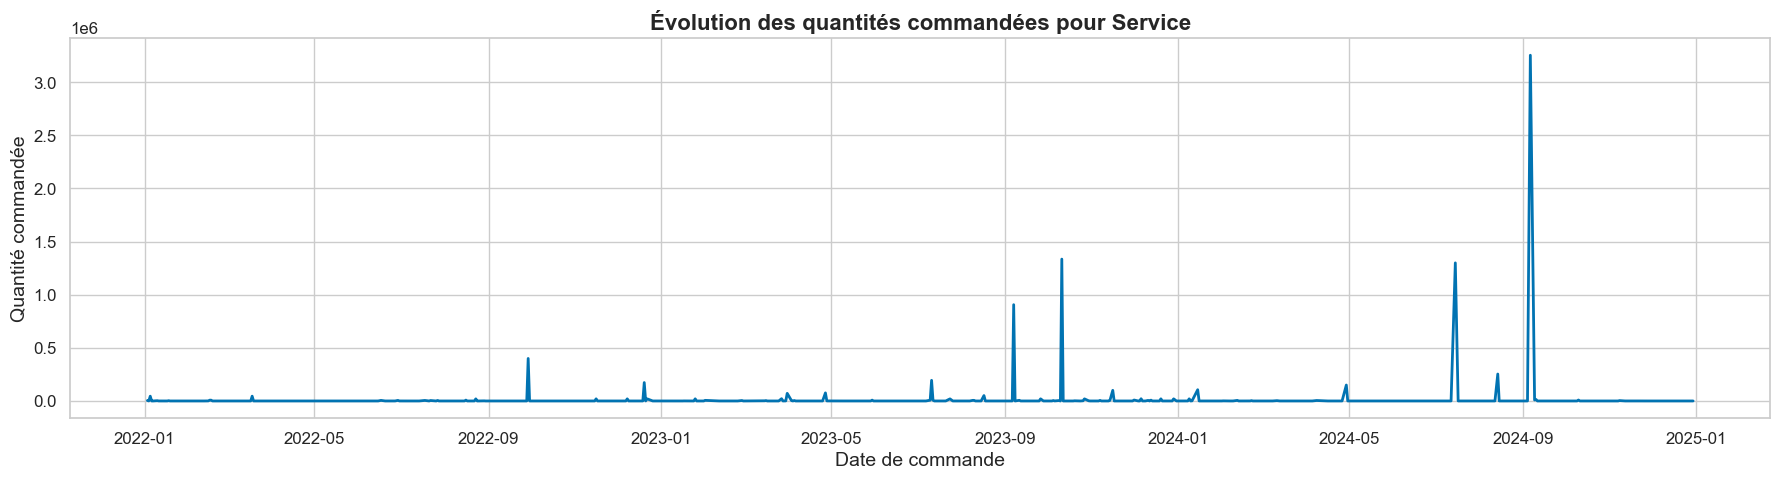

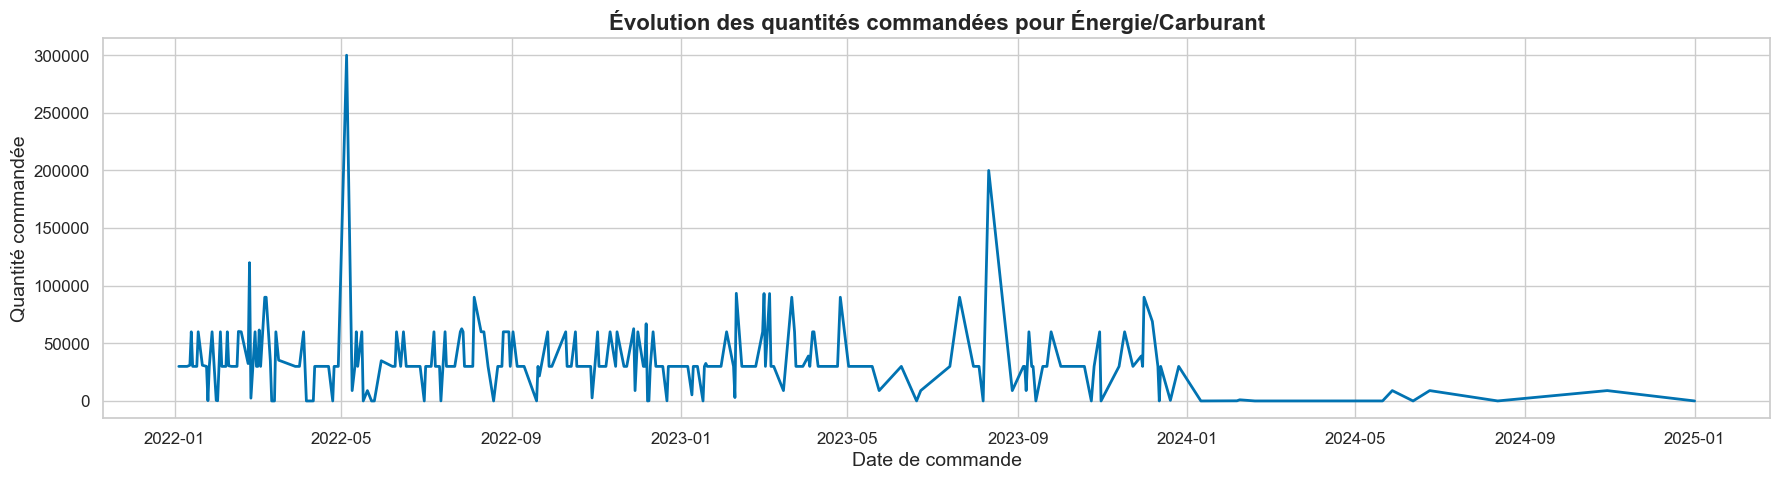

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper par date et type d'article pour obtenir la somme des quantités
df_evolution = achats.groupby(['Date commande', 'Type article'])['quantité'].sum().reset_index()

# Réorganiser les données pour que chaque type d'article ait sa propre courbe
df_pivot = df_evolution.pivot(index='Date commande', columns='Type article', values='quantité')

# Style moderne et lisible
sns.set(style="whitegrid", palette="colorblind", font_scale=1.1)

# Tracer chaque type d'article dans une courbe séparée
for col in df_pivot.columns:
    plt.figure(figsize=(18, 5))  # Créer une nouvelle figure pour chaque type d'article
    sns.lineplot(data=df_pivot, x=df_pivot.index, y=col, linewidth=2)
    
    # Titres et axes
    plt.title(f"Évolution des quantités commandées pour {col}", fontsize=16, weight='bold')
    plt.xlabel("Date de commande", fontsize=14)
    plt.ylabel("Quantité commandée", fontsize=14)
    
    # Afficher la courbe
    plt.tight_layout()
    plt.show()







In [70]:
# Calculer la fréquence par mois PAR TYPE D'ARTICLE
frequence_par_type = achats.groupby('Type article')['Date commande'].count() / achats.groupby('Type article')['Date commande'].apply(lambda x: x.dt.to_period('M').nunique())
achats = achats.merge(frequence_par_type.rename('Fréquence'), on='Type article')



In [71]:
print(frequence_par_type.describe())


count      8.000000
mean      79.539370
std      135.224923
min       11.592593
25%       12.830882
50%       16.225694
75%       56.722222
max      394.891892
Name: Date commande, dtype: float64


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\660489016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=achats, x='Type article', y='Fréquence', order=order, palette='Blues_d')


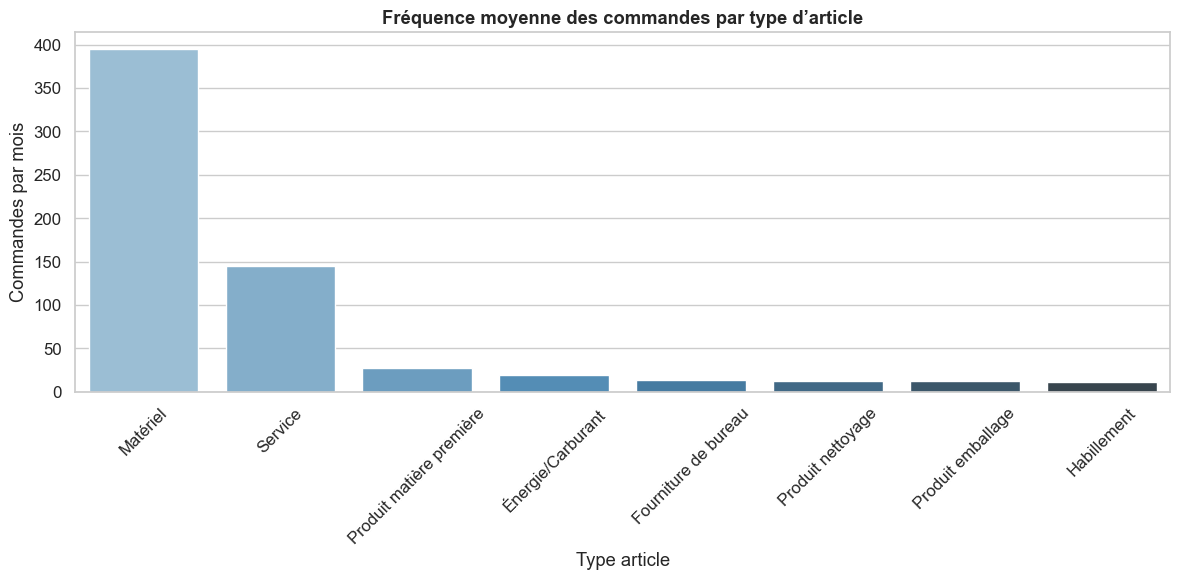

In [72]:
plt.figure(figsize=(12, 6))
order = achats.groupby('Type article')['Fréquence'].mean().sort_values(ascending=False).index
sns.barplot(data=achats, x='Type article', y='Fréquence', order=order, palette='Blues_d')
plt.title('Fréquence moyenne des commandes par type d’article', weight='bold')
plt.ylabel('Commandes par mois')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:

# Afficher les premières et dernières dates de commande
print("Première date de commande :", achats['Date commande'].min())
print("Dernière date de commande :", achats['Date commande'].max())

Première date de commande : 2022-01-03 00:00:00
Dernière date de commande : 2025-01-01 00:00:00


In [74]:
def definir_horizon_par_frequence(freq):
    if freq <= 13:        # fréquence basse (<= médiane)
        return 60          # horizon long terme
    elif freq <= 27.41:   # fréquence moyenne
        return 30          # horizon moyen terme
    else:                 # fréquence élevée
        return 7           # horizon court terme

achats['Horizon'] = achats['Fréquence'].apply(definir_horizon_par_frequence)


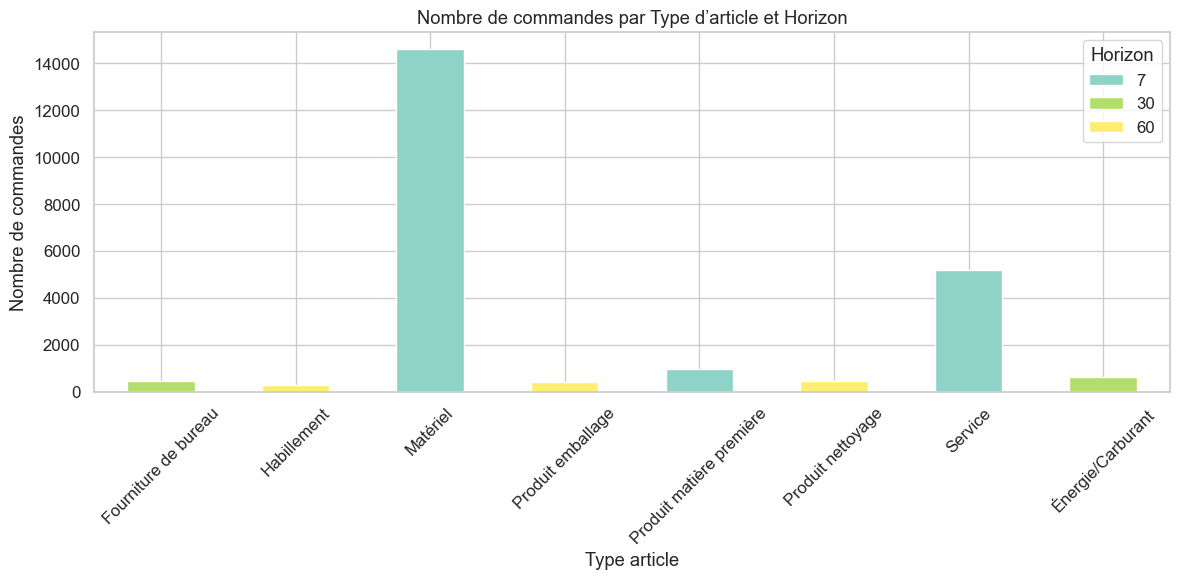

In [75]:
pivot = achats.groupby(['Type article', 'Horizon']).size().unstack(fill_value=0)

pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Nombre de commandes par Type d’article et Horizon')
plt.xlabel('Type article')
plt.ylabel('Nombre de commandes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [76]:
 #Sauvegarder le DataFrame mis à jour dans un fichier CSV
achats.to_csv('achats_streamlit.csv', index=False)

print("Fichier CSV sauvegardé : achats_streamlit.csv")

Fichier CSV sauvegardé : achats_streamlit.csv


In [77]:
# 1. Détection des bornes IQR
Q1 = achats['quantité'].quantile(0.25)
Q3 = achats['quantité'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 2. Détection des index des outliers
outliers_index = achats[(achats['quantité'] < lower) | (achats['quantité'] > upper)].index

# 3. Affichage des outliers détectés
print("Liste des outliers détectés :")
print(achats.loc[outliers_index, ['quantité']])

# 4. Remplacement des outliers par la médiane
median_value = achats['quantité'].median()
achats.loc[outliers_index, 'quantité'] = median_value

Liste des outliers détectés :
       quantité
1       30000.0
2       45000.0
3        3402.0
5       40000.0
8        1500.0
...         ...
23048      30.0
23049      30.0
23067      36.0
23068  253440.0
23082      30.0

[3833 rows x 1 columns]


In [78]:
print(achats.columns)


Index(['N°commande', 'Code article', 'Article ', 'Type article', 'Quantité',
       'UM', 'Date commande', 'Date réception', 'conformité',
       'Code Fournisseur', 'Nom Fournisseur', 'adresse', 'quantité',
       'Coût unitaire', 'Taux de conformité (%)', 'Nombre de commandes',
       'Respect_délais', 'Taux de Respect (%)', 'Coût unitaire normalisé',
       'Nombre commandes normalisé', 'Score', 'Catégorie', 'Fréquence',
       'Horizon'],
      dtype='object')


In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import time
# Préparation des données
achats['Date commande'] = pd.to_datetime(achats['Date commande'])
# Extraire le mois, l'année et le trimestre
achats['Mois'] = achats['Date commande'].dt.month
achats['Année'] = achats['Date commande'].dt.year
achats['Jour'] = achats['Date commande'].dt.day





# Créer 'Article_Fournisseur' 
# 7. Création d'une variable combinée 'Article_Fournisseur' pour l'analyse
achats['Article_Fournisseur'] = achats['Article '] + " - " + achats['Nom Fournisseur']
achats['Code article'] = achats['Code article'].str.strip()
# Créer l'encodeur
le = LabelEncoder()
# Créer l'encodeur pour les colonnes 'Code article' et 'Code Fournisseur'
le_article = LabelEncoder()

# Encoder la colonne "Type article"
achats['Type article_encoded'] = le.fit_transform(achats['Type article'])
# Encoder les colonnes 'Code article' et 'Code Fournisseur'
achats['Code article_encoded'] = le_article.fit_transform(achats['Code article'])


# Sélectionner les features à utiliser dans le modèle
features = [
    'Type article_encoded', 'Mois', 'Année', 'Horizon', 'Code article_encoded', 'Code Fournisseur', 'Jour', 
]


# Préparer les données
X = achats[features]
y = np.log1p(achats['quantité'])

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Entraînement
rf_model = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=30, min_samples_split=5)

start_train = time.time()
rf_model.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train



# Prédictions
start_pred = time.time()
rf_predictions = np.expm1(rf_model.predict(X_test))
end_pred = time.time()
prediction_time = end_pred - start_pred

y_test_raw = np.expm1(y_test)

# Évaluer
rmse = root_mean_squared_error(y_test_raw, rf_predictions)
mae = mean_absolute_error(y_test_raw, rf_predictions)
mse = mean_squared_error(y_test_raw, rf_predictions)

r2 = r2_score(y_test_raw, rf_predictions)

print("\n🔹 [Random Forest] Résultats de performance :")

print(f"RMSE : {rmse:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

print(f"⏱️ Temps d'entraînement : {training_time:.4f} secondes")
print(f"⏱️ Temps de prédiction  : {prediction_time:.4f} secondes")




🔹 [Random Forest] Résultats de performance :
RMSE : 2.3072
MSE  : 5.3232
MAE  : 1.1467
R²   : 0.3740
⏱️ Temps d'entraînement : 10.3905 secondes
⏱️ Temps de prédiction  : 0.2348 secondes


In [81]:


# Afficher les résultats
results = X_test.copy()
results['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results['Quantité_Prédite_RF'] = rf_predictions
results['Quantité_Réelle'] = y_test_raw
results['Erreur_Absolue'] = np.abs(results['Quantité_Prédite_RF'] - results['Quantité_Réelle'])
results['Date commande'] = achats.loc[X_test.index, 'Date commande'].values
results['Type article'] = achats.loc[X_test.index, 'Type article'].values
results['UM'] = achats.loc[X_test.index, 'UM'].values
results[['Article_Fournisseur','Type article', 'Date commande', 'Horizon', 'Quantité_Prédite_RF', 'Quantité_Réelle', 'Erreur_Absolue','UM']].head()



,Article_Fournisseur,Type article,Date commande,Horizon,Quantité_Prédite_RF,Quantité_Réelle,Erreur_Absolue,UM
1215,analyse bacteriologique - Société Saeed,Service,2022-03-08,7,3.119009,4.0,0.880991,UN
9645,Couvercle2541648-0000 - Société Gharbi,Matériel,2023-01-17,7,1.067266,1.0,0.067266,PI
21646,Réparation Palette - Société Ben l...,Service,2024-02-12,7,1.867350,1.0,0.867350,PI
16349,SCREW 6-4722525101/90458-0072 - Société Belhadj,Matériel,2023-01-05,7,3.132615,3.0,0.132615,PI
11237,Confection piéces -Mars 2023 - Société Khalifa,Service,2023-04-05,7,1.144812,1.0,0.144812,PI


In [82]:
# Prédictions sur les données d'entraînement
y_train_pred = np.expm1(rf_model.predict(X_train))  # on inverse log1p()
y_test_pred = np.expm1(rf_model.predict(X_test))    # déjà fait plus haut, mais c'est ok ici aussi

# Inverser la transformation log1p sur y_train et y_test
y_train_raw = np.expm1(y_train)
y_test_raw = np.expm1(y_test)

# Calcul des scores R²
r2_train = r2_score(y_train_raw, y_train_pred)
r2_test = r2_score(y_test_raw, y_test_pred)

# Affichage
print(f"R² (Train): {r2_train:.4f}")
print(f"R² (Test) : {r2_test:.4f}")



R² (Train): 0.6715
R² (Test) : 0.3740


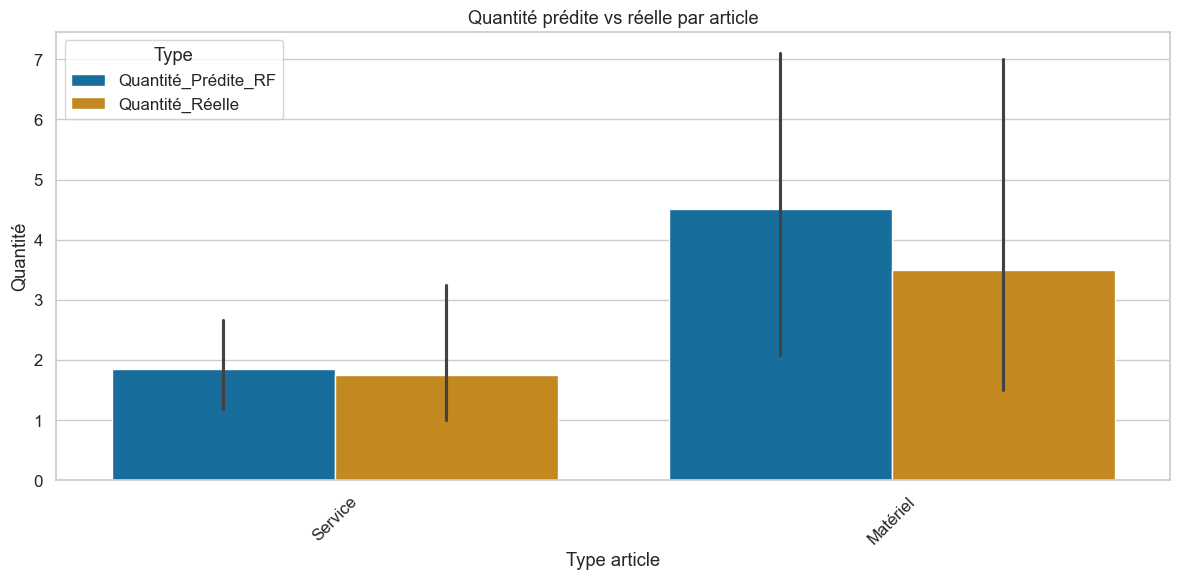

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple : afficher les 10 premiers articles
df_plot = results[['Type article', 'Quantité_Prédite_RF', 'Quantité_Réelle']].head(10)

# Mise en forme "long format" pour Seaborn
df_melt = df_plot.melt(id_vars='Type article', 
                       value_vars=['Quantité_Prédite_RF', 'Quantité_Réelle'], 
                       var_name='Type', 
                       value_name='Quantité')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='Type article', y='Quantité', hue='Type')
plt.xticks(rotation=45)
plt.title('Quantité prédite vs réelle par article')
plt.tight_layout()
plt.show()


In [84]:
achats

,N°commande,Code article,Article,Type article,Quantité,UM,Date commande,Date réception,conformité,Code Fournisseur,...,Score,Catégorie,Fréquence,Horizon,Mois,Année,Jour,Article_Fournisseur,Type article_encoded,Code article_encoded
0,22000002,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,2022-01-03,2022-01-12,1,5006997,...,6.825537,Moyen,27.416667,7,1,2022,3,SRTJ du E2:E13530/11/2021. - Sociét...,4,481
1,22000002,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,2022-01-04,2022-01-20,1,5005182,...,6.886661,Moyen,19.312500,30,1,2022,4,FUEL LOURD N°2 - Société Gharbi,7,1540
2,22000003,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,2022-01-05,2022-01-30,1,5006889,...,6.852617,Moyen,144.638889,7,1,2022,5,FILM THERMORÉTRACTABLE NG 40µ - Société Hammami,6,648
3,22000003,HSDLI007,reparation palettes,Service,3402.0,UN,2022-01-03,2022-01-15,1,5007369,...,6.935975,Moyen,144.638889,7,1,2022,3,reparation palettes - Société Allah,6,477
4,22000003,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2022-01-04,2022-01-10,1,5005182,...,6.883973,Moyen,394.891892,7,1,2022,4,Glasse de niv Type A N°7 A/JTS - Société Gharbi,2,1816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,24900731,HSCLN0015,frais de participation,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,7.025381,Moyen,144.638889,7,10,2024,24,frais de participation - Société Ben M...,6,442
23079,24900731,HSCLN0015,hebergement,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,7.025392,Moyen,144.638889,7,10,2024,24,hebergement - Société Ben M...,6,442
23080,24900732,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,2024-10-24,2024-10-31,1,559911,...,7.025380,Moyen,144.638889,7,10,2024,24,Abonnement salle de sport - Société Ben M...,6,441
23081,24900733,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,2024-10-24,2024-10-31,1,550645,...,6.962161,Moyen,394.891892,7,10,2024,24,disque dur externe SSD 512 go - Société Ben n...,2,459


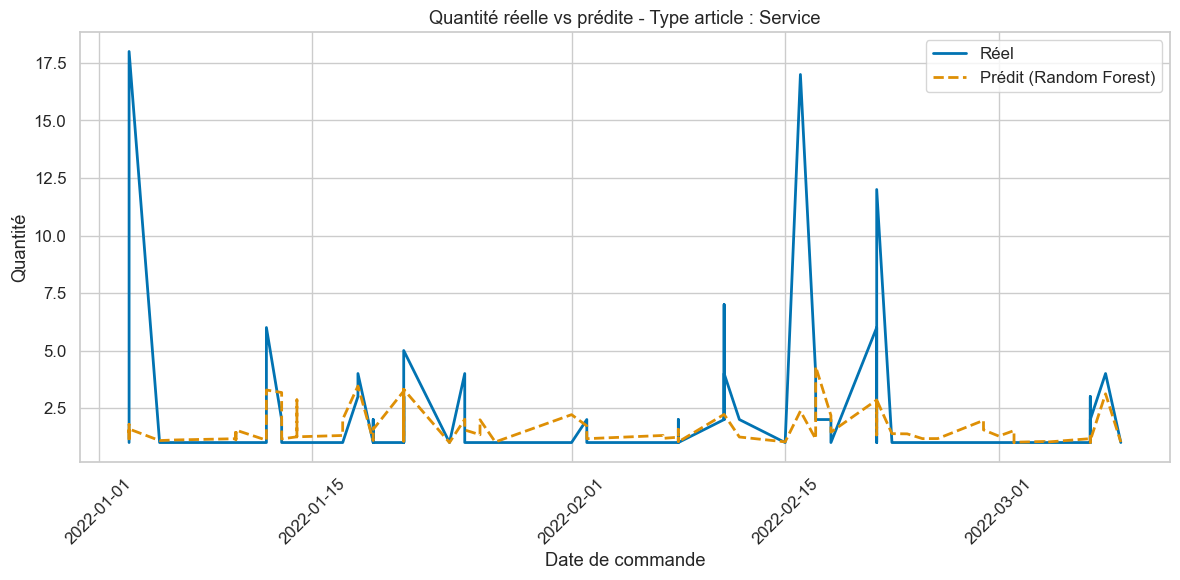

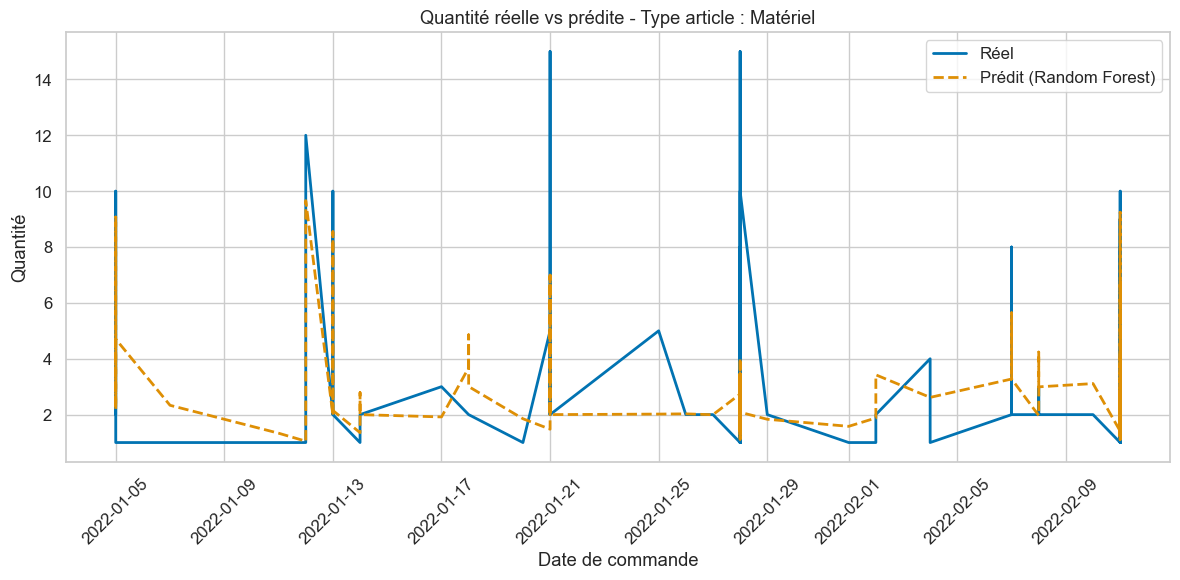

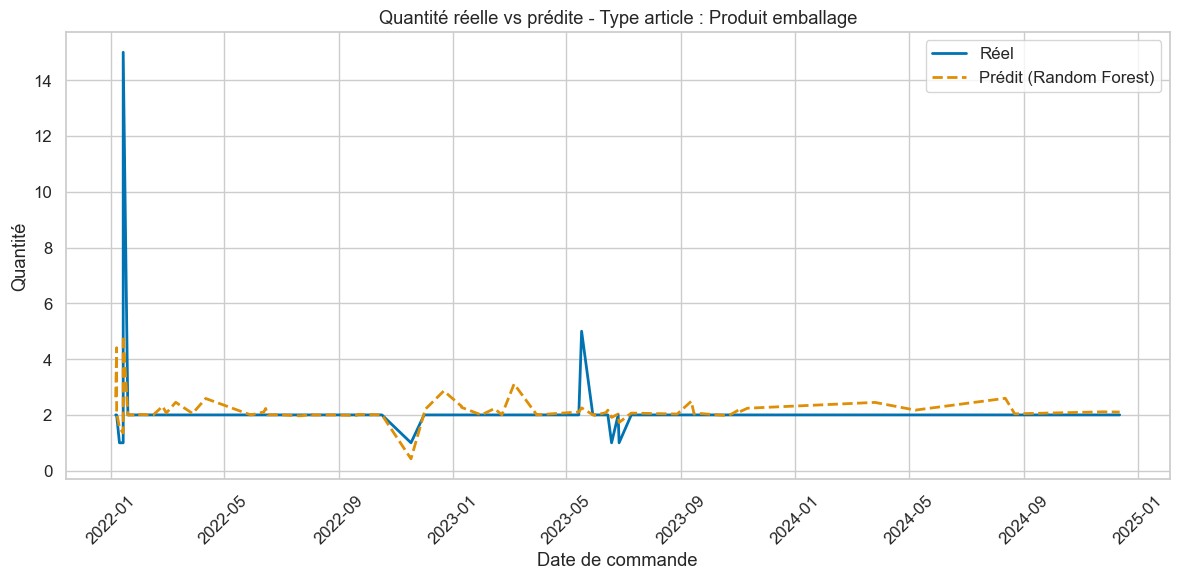

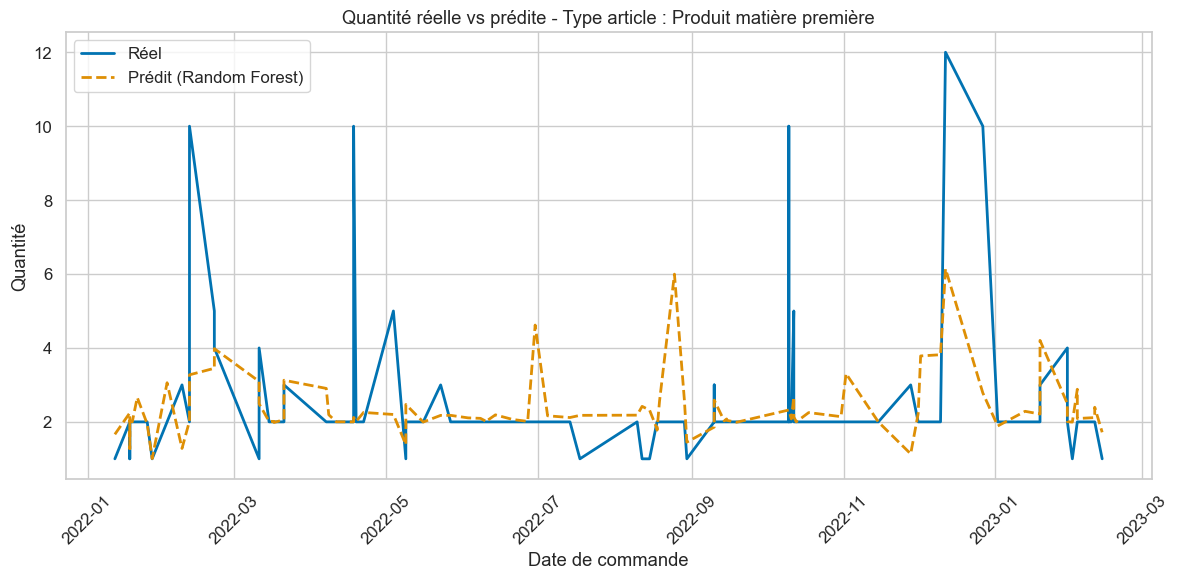

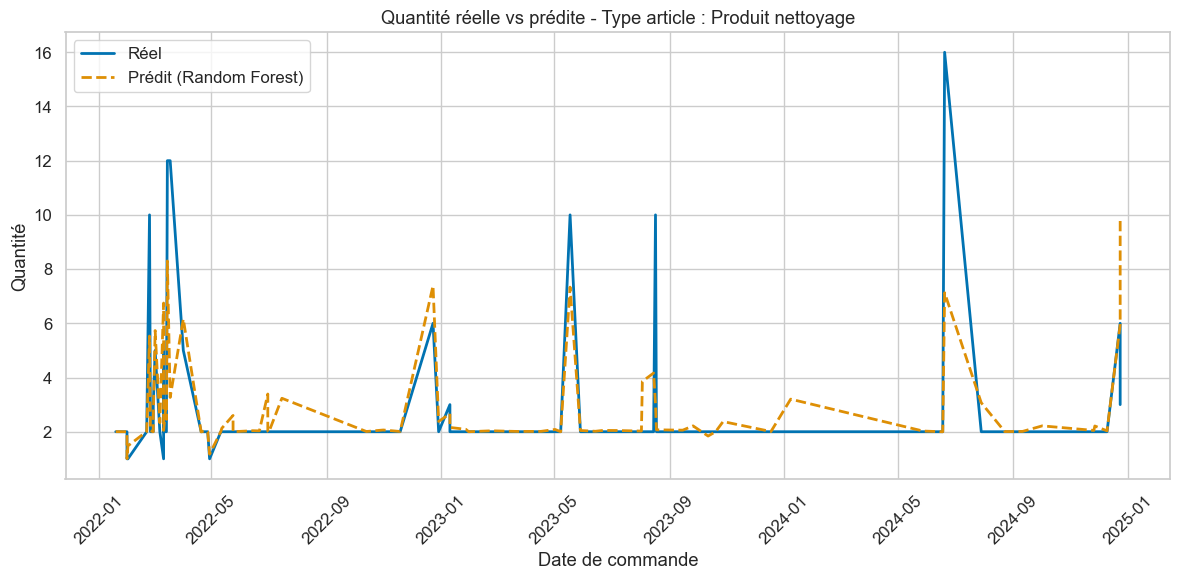

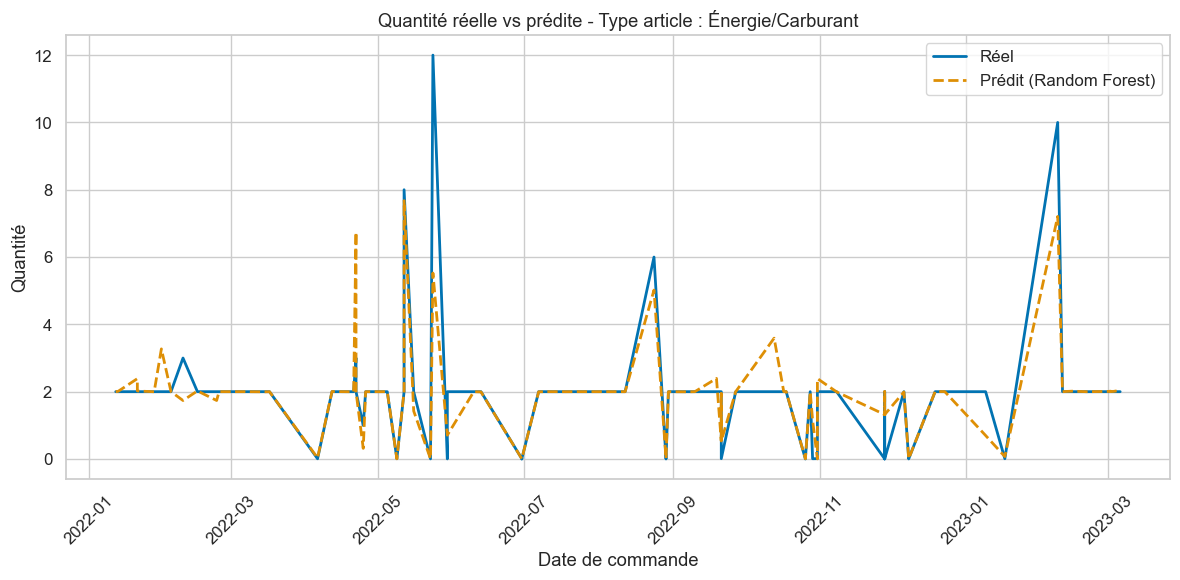

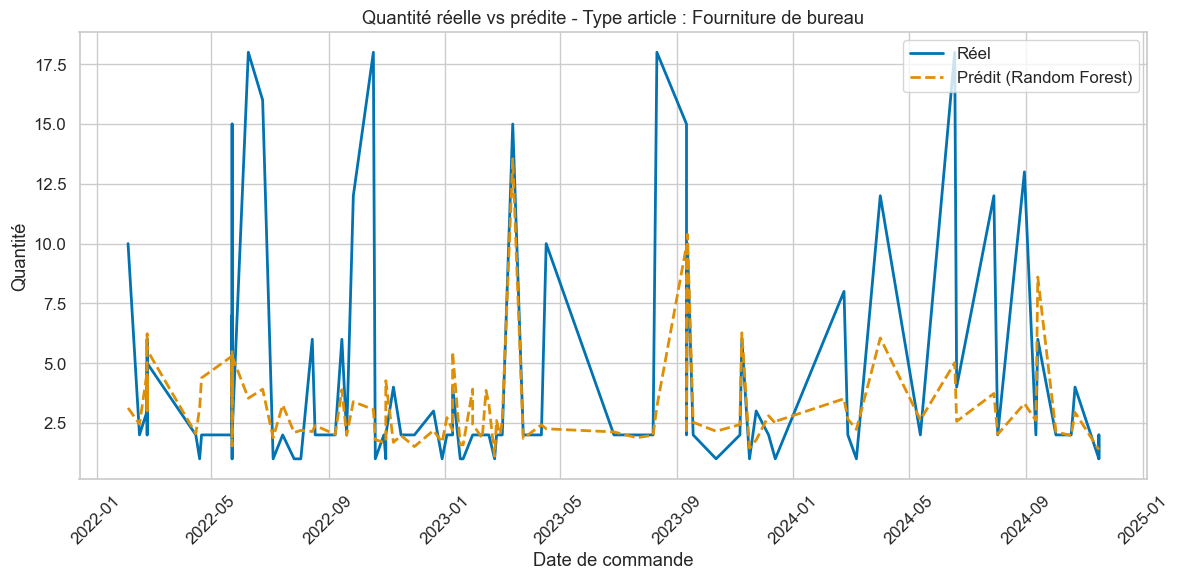

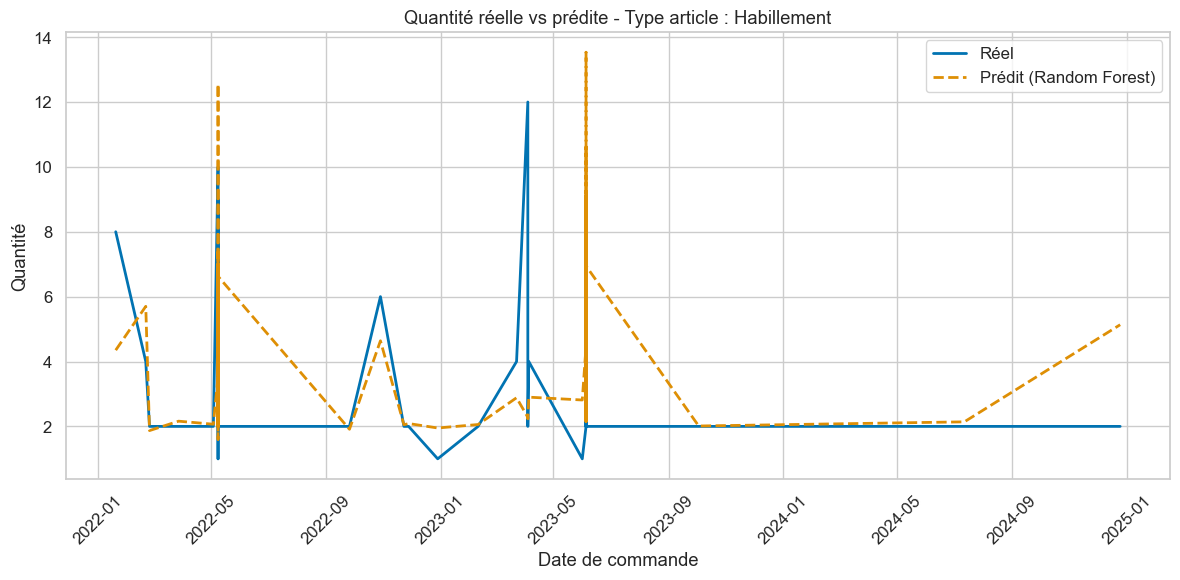

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# S'assurer que les dates sont bien en datetime
results['Date commande'] = pd.to_datetime(results['Date commande'])

# Obtenir la liste des types d'article uniques
types_articles = results["Type article"].unique()

# Tracer chaque type d'article dans un graphique séparé, limité aux 50 premiers points
for type_article in types_articles:
    df_type = results[results["Type article"] == type_article].sort_values('Date commande')
    df_type_50 = df_type.head(100)  # prendre uniquement les 50 premiers

    plt.figure(figsize=(12, 6))
    plt.plot(df_type_50['Date commande'], df_type_50['Quantité_Réelle'], label='Réel', linewidth=2)
    plt.plot(df_type_50['Date commande'], df_type_50['Quantité_Prédite_RF'], label='Prédit (Random Forest)', linestyle='--', linewidth=2)
    plt.title(f"Quantité réelle vs prédite - Type article : {type_article}")
    plt.xlabel('Date de commande')
    plt.ylabel('Quantité')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


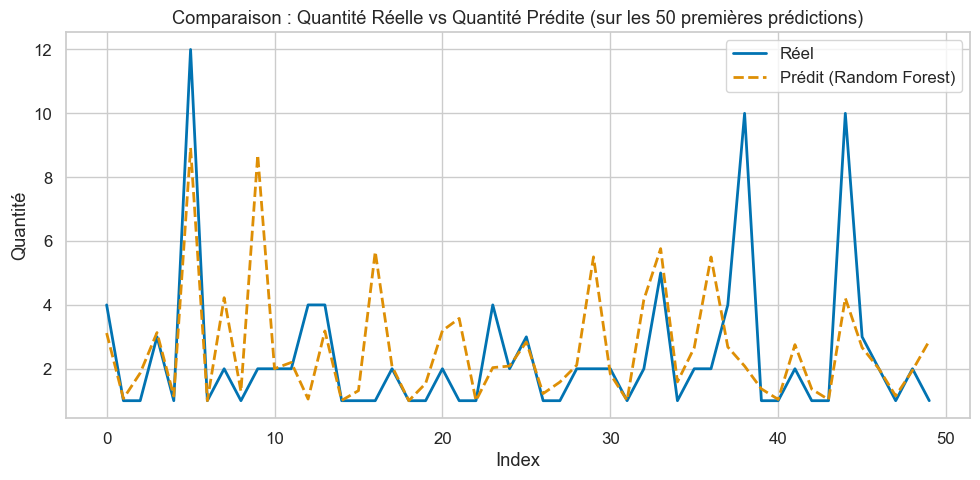

In [86]:
import matplotlib.pyplot as plt

# Suppose que tu as un DataFrame 'results' contenant les colonnes 'Quantité_Réelle' et 'Quantité_Prédite'
results = pd.DataFrame({
    'Quantité_Réelle': y_test_raw[:50],       # valeurs réelles
    'Quantité_Prédite_RF': rf_predictions[:50]   # valeurs prédites
})

plt.figure(figsize=(10, 5))
plt.plot(results['Quantité_Réelle'].values, label='Réel', linewidth=2)
plt.plot(results['Quantité_Prédite_RF'].values, label='Prédit (Random Forest)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantité Réelle vs Quantité Prédite (sur les 50 premières prédictions)')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [87]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [88]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Meilleurs paramètres trouvés par GridSearchCV
best_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 200
}

# Entraînement avec XGBoost
xgb_model = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entraînement du modèle avec mesure du temps
start_train = time.time()
xgb_model.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# Prédictions avec mesure du temps
start_pred = time.time()
xgb_predictions = np.expm1(xgb_model.predict(X_test))
end_pred = time.time()
prediction_time = end_pred - start_pred

# Évaluation des performances
xgb_mse = mean_squared_error(y_test_raw, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test_raw, xgb_predictions)
xgb_r2 = r2_score(y_test_raw, xgb_predictions)

# Affichage des résultats
print("\n🔹 [XGBoost] Résultats de performance :")

print(f"RMSE : {xgb_rmse}")
print(f"MSE  : {xgb_mse}")
print(f"MAE  : {xgb_mae}")
print(f"R²   : {xgb_r2}")

print(f"⏱️ Temps d'entraînement : {training_time:.4f} secondes")
print(f"⏱️ Temps de prédiction  : {prediction_time:.4f} secondes")

# Résultats XGBoost
results_xgb = X_test.copy()
results_xgb['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results_xgb['Quantité_Predite_XGB'] = xgb_predictions
results_xgb['Quantité_Réelle'] = y_test_raw
results_xgb['Erreur_Absolue'] = np.abs(results_xgb['Quantité_Predite_XGB'] - results_xgb['Quantité_Réelle'])
results_xgb['Date commande'] = achats.loc[X_test.index, 'Date commande'].values
results_xgb['Type article'] = achats.loc[X_test.index, 'Type article'].values
print("\nExtrait des résultats XGBoost :")
results_xgb[['Article_Fournisseur', 'Type article','Date commande','Horizon', 'Quantité_Predite_XGB', 'Quantité_Réelle', 'Erreur_Absolue']].head()




🔹 [XGBoost] Résultats de performance :
RMSE : 2.682973015106943
MSE  : 7.19834419979204
MAE  : 1.46005680445755
R²   : 0.15342911656811364
⏱️ Temps d'entraînement : 0.2596 secondes
⏱️ Temps de prédiction  : 0.0080 secondes

Extrait des résultats XGBoost :


,Article_Fournisseur,Type article,Date commande,Horizon,Quantité_Predite_XGB,Quantité_Réelle,Erreur_Absolue
1215,analyse bacteriologique - Société Saeed,Service,2022-03-08,7,2.371935,4.0,1.628065
9645,Couvercle2541648-0000 - Société Gharbi,Matériel,2023-01-17,7,1.437752,1.0,0.437752
21646,Réparation Palette - Société Ben l...,Service,2024-02-12,7,1.998791,1.0,0.998791
16349,SCREW 6-4722525101/90458-0072 - Société Belhadj,Matériel,2023-01-05,7,2.539689,3.0,0.460311
11237,Confection piéces -Mars 2023 - Société Khalifa,Service,2023-04-05,7,1.650312,1.0,0.650312


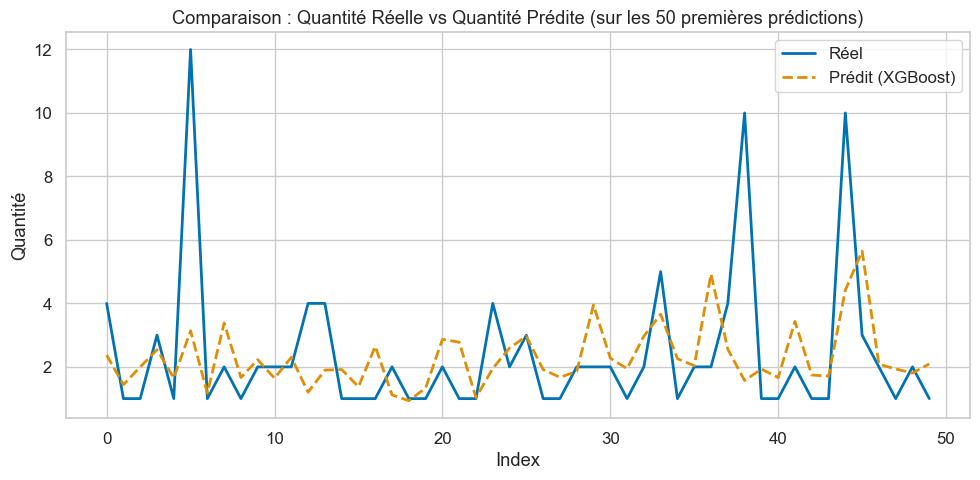

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Suppose que tu as un DataFrame 'results_xgb' contenant les colonnes 'Quantité_Réelle' et 'Quantité_Prédite'
results_xgb = pd.DataFrame({
    'Quantité_Réelle': y_test_raw[:50],       # valeurs réelles
    'Quantité_Predite_XGB': xgb_predictions[:50]  # valeurs prédites
})

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(results_xgb['Quantité_Réelle'].values, label='Réel', linewidth=2)
plt.plot(results_xgb['Quantité_Predite_XGB'].values, label='Prédit (XGBoost)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantité Réelle vs Quantité Prédite (sur les 50 premières prédictions)')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Entraînement avec CatBoost
catboost_model = CatBoostRegressor(
    iterations=500,
    depth=10,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bylevel=1.0,
    random_state=42,
    silent=True  # Désactive les logs pendant l'entraînement
)

# Entraînement du modèle avec mesure du temps
start_train = time.time()
catboost_model.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# Prédictions avec mesure du temps
start_pred = time.time()
catboost_predictions = np.expm1(catboost_model.predict(X_test))
end_pred = time.time()
prediction_time = end_pred - start_pred

# Évaluation des performances
catboost_mse = mean_squared_error(y_test_raw, catboost_predictions)
catboost_rmse = np.sqrt(catboost_mse)
catboost_mae = mean_absolute_error(y_test_raw, catboost_predictions)
catboost_r2 = r2_score(y_test_raw, catboost_predictions)

# Affichage des résultats
print("\n🔹 [CatBoost] Résultats de performance :")

print(f"RMSE : {catboost_rmse}")
print(f"MSE  : {catboost_mse}")
print(f"MAE  : {catboost_mae}")

print(f"R²   : {catboost_r2}")
print(f"⏱️ Temps d'entraînement : {training_time:.4f} secondes")
print(f"⏱️ Temps de prédiction  : {prediction_time:.4f} secondes")

# Résultats CatBoost
results_catboost = X_test.copy()
results_catboost['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results_catboost['Quantité_Predite_CB'] = catboost_predictions
results_catboost['Quantité_Réelle'] = y_test_raw
results_catboost['Erreur_Absolue'] = np.abs(results_catboost['Quantité_Predite_CB'] - results_catboost['Quantité_Réelle'])
results_catboost['Date commande'] = achats.loc[X_test.index, 'Date commande'].values
results_catboost['Type article'] = achats.loc[X_test.index, 'Type article'].values
print("\nExtrait des résultats CatBoost :")


results_catboost[['Article_Fournisseur', 'Type article', 'Date commande', 'Horizon', 'Quantité_Predite_CB', 'Quantité_Réelle', 'Erreur_Absolue']].head()



🔹 [CatBoost] Résultats de performance :
RMSE : 2.664792748397183
MSE  : 7.101120391910213
MAE  : 1.44200305725898
R²   : 0.16486325234221422
⏱️ Temps d'entraînement : 6.8932 secondes
⏱️ Temps de prédiction  : 0.0156 secondes

Extrait des résultats CatBoost :


,Article_Fournisseur,Type article,Date commande,Horizon,Quantité_Predite_CB,Quantité_Réelle,Erreur_Absolue
1215,analyse bacteriologique - Société Saeed,Service,2022-03-08,7,2.666221,4.0,1.333779
9645,Couvercle2541648-0000 - Société Gharbi,Matériel,2023-01-17,7,1.616499,1.0,0.616499
21646,Réparation Palette - Société Ben l...,Service,2024-02-12,7,1.723900,1.0,0.723900
16349,SCREW 6-4722525101/90458-0072 - Société Belhadj,Matériel,2023-01-05,7,2.638885,3.0,0.361115
11237,Confection piéces -Mars 2023 - Société Khalifa,Service,2023-04-05,7,1.570527,1.0,0.570527


In [91]:
# S'assurer que les dates sont bien triées
results_catboost['Date commande'] = pd.to_datetime(results['Date commande'])

# Obtenir la liste des types d'article uniques
types_articles = results_catboost["Type article"].unique()

# Tracer chaque type d'article dans un graphique séparé
for type_article in types_articles:
    df_type = results_catboost[results_catboost["Type article"] == type_article].sort_values('Date commande')
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_type['Date commande'], df_type['Quantité_Réelle'], label='Réel', linewidth=2)
    plt.plot(df_type['Date commande'], df_type['Quantité_Predite_CB'], label='Prédit (Catboost)', linestyle='--', linewidth=2)
    plt.title(f"Quantité réelle vs prédite - Type article : {type_article}")
    plt.xlabel('Date de commande')
    plt.ylabel('Quantité')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

KeyError: 'Date commande'

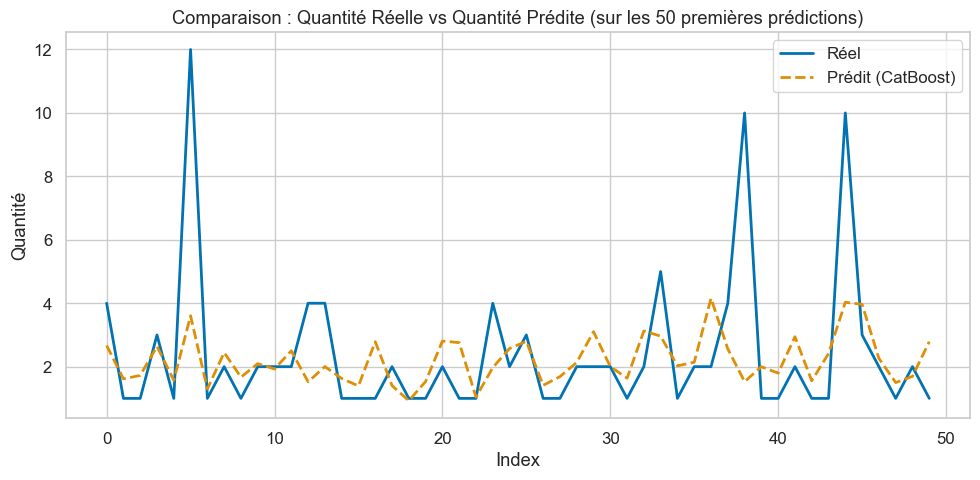

In [ ]:
# Visualisation des résultats
results_catboost_viz = pd.DataFrame({
    'Quantité_Réelle': y_test_raw[:50],       # valeurs réelles
    'Quantité_Predite_CB': catboost_predictions[:50]  # valeurs prédites
})

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(results_catboost_viz['Quantité_Réelle'].values, label='Réel', linewidth=2)
plt.plot(results_catboost_viz['Quantité_Predite_CB'].values, label='Prédit (CatBoost)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantité Réelle vs Quantité Prédite (sur les 50 premières prédictions)')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🔹 [Random Forest] Résultats de performance :
RMSE : 2.307196985641389
MAE : 1.1467274902086444
R² : 0.3739629021844144

🔹 [XGBoost] Résultats de performance :
RMSE : 2.682973015106943
MAE : 1.46005680445755
R² : 0.15342911656811364

🔹 [CatBoost] Résultats de performance :
RMSE : 2.664792748397183
MAE : 1.44200305725898
R² : 0.16486325234221422


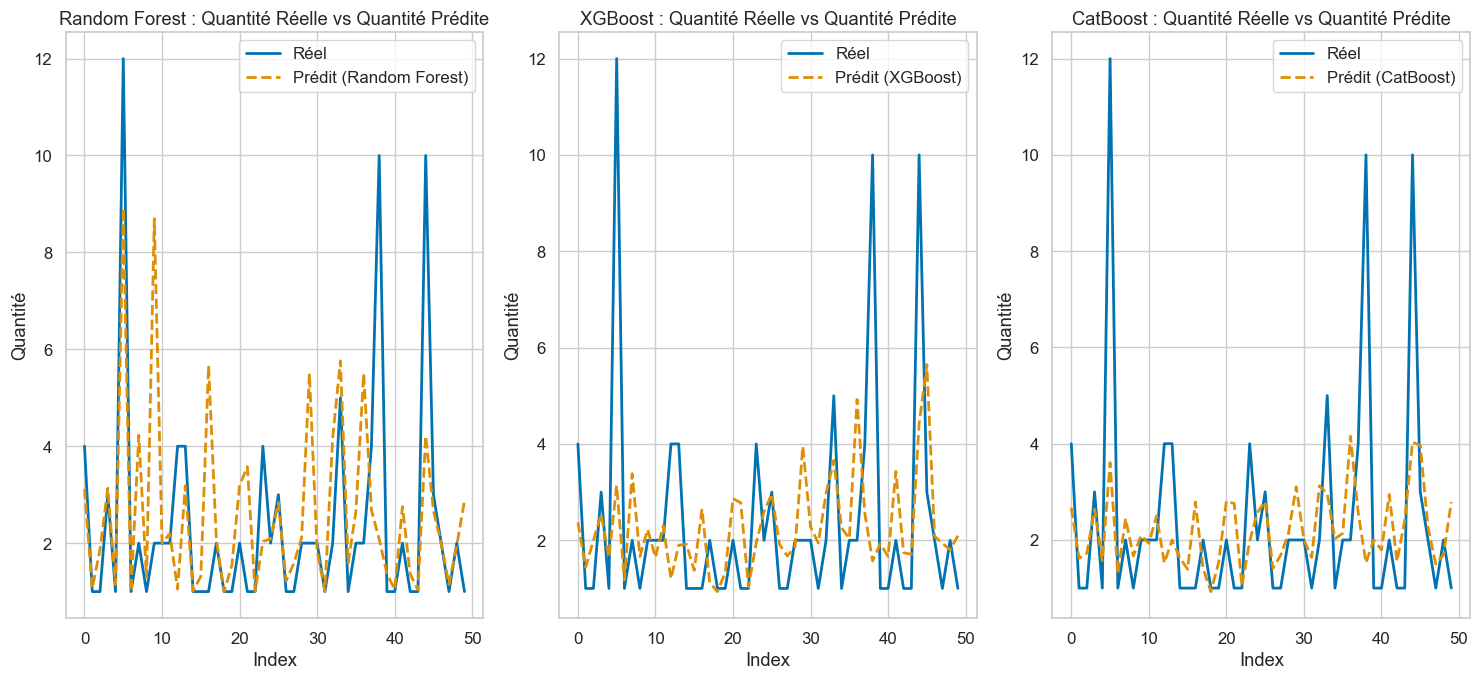


🔹 Résumé des métriques pour chaque modèle :
           Model      RMSE       MAE        R²
0  Random Forest  2.307197  1.146727  0.373963
1        XGBoost  2.682973  1.460057  0.153429
2       CatBoost  2.664793  1.442003  0.164863


In [ ]:
# Prédictions de chaque modèle (on a déjà XGBoost, Random Forest et CatBoost entraînés)
rf_predictions = np.expm1(rf_model.predict(X_test))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test))  # CatBoost

# Calcul des métriques pour chaque modèle
def print_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n🔹 [{model_name}] Résultats de performance :")
    print("RMSE :", rmse)
    print("MAE :", mae)
    print("R² :", r2)
    return rmse, mae, r2

# Affichage des résultats de chaque modèle
rf_rmse, rf_mae, rf_r2 = print_metrics(y_test_raw, rf_predictions, "Random Forest")
xgb_rmse, xgb_mae, xgb_r2 = print_metrics(y_test_raw, xgb_predictions, "XGBoost")
catboost_rmse, catboost_mae, catboost_r2 = print_metrics(y_test_raw, catboost_predictions, "CatBoost")

# Comparaison visuelle des prédictions des trois modèles
plt.figure(figsize=(15, 7))

# Graphiques pour comparer les trois modèles (50 premières prédictions)
plt.subplot(1, 3, 1)
plt.plot(y_test_raw[:50].values, label='Réel', linewidth=2)
plt.plot(rf_predictions[:50], label='Prédit (Random Forest)', linestyle='--', linewidth=2)
plt.title('Random Forest : Quantité Réelle vs Quantité Prédite')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(y_test_raw[:50].values, label='Réel', linewidth=2)
plt.plot(xgb_predictions[:50], label='Prédit (XGBoost)', linestyle='--', linewidth=2)
plt.title('XGBoost : Quantité Réelle vs Quantité Prédite')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(y_test_raw[:50].values, label='Réel', linewidth=2)
plt.plot(catboost_predictions[:50], label='Prédit (CatBoost)', linestyle='--', linewidth=2)
plt.title('CatBoost : Quantité Réelle vs Quantité Prédite')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Résumé des métriques pour comparaison
print("\n🔹 Résumé des métriques pour chaque modèle :")
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'CatBoost'],
    'RMSE': [rf_rmse, xgb_rmse, catboost_rmse],
    'MAE': [rf_mae, xgb_mae, catboost_mae],
    'R²': [rf_r2, xgb_r2, catboost_r2]
})

print(comparison_df)


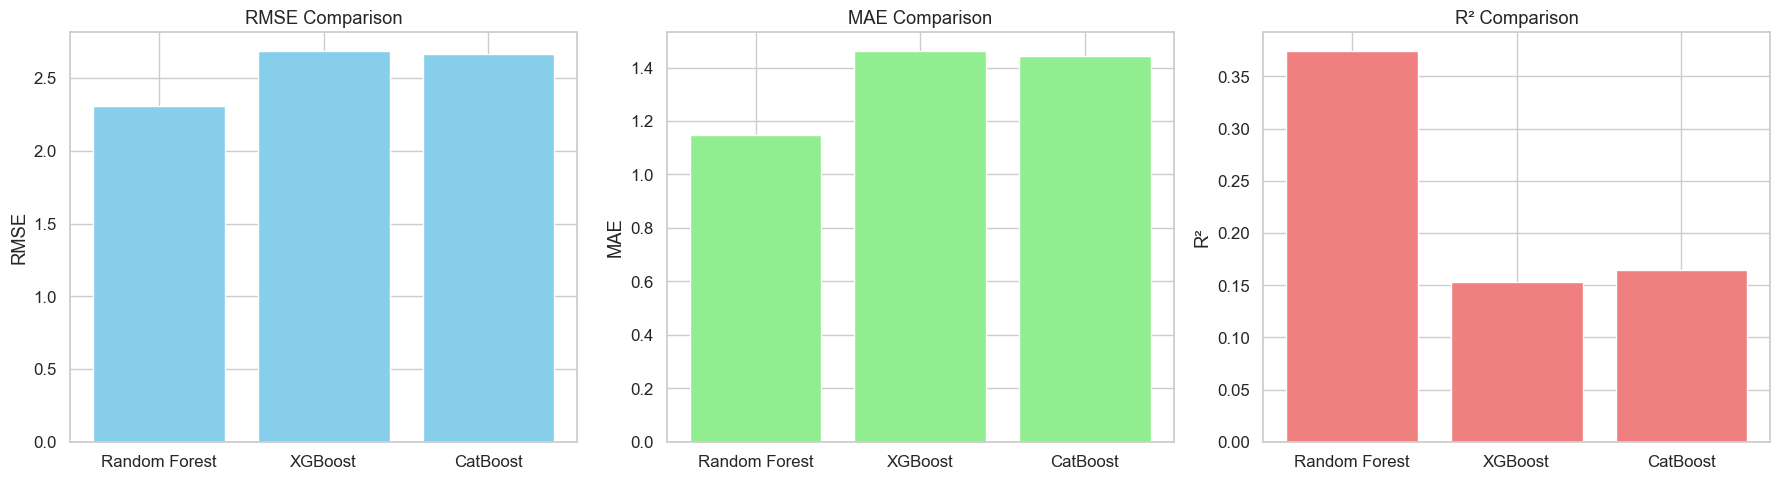

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédictions des trois modèles (en supposant qu'elles sont déjà calculées)
rf_predictions = np.expm1(rf_model.predict(X_test))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test))  # CatBoost

# Calcul des métriques pour chaque modèle
def get_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Métriques pour chaque modèle
rf_rmse, rf_mae, rf_r2 = get_metrics(y_test_raw, rf_predictions)
xgb_rmse, xgb_mae, xgb_r2 = get_metrics(y_test_raw, xgb_predictions)
catboost_rmse, catboost_mae, catboost_r2 = get_metrics(y_test_raw, catboost_predictions)

# Comparaison visuelle des résultats
models = ['Random Forest', 'XGBoost', 'CatBoost']
rmse_values = [rf_rmse, xgb_rmse, catboost_rmse]
mae_values = [rf_mae, xgb_mae, catboost_mae]
r2_values = [rf_r2, xgb_r2, catboost_r2]

# Création de la figure
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# RMSE - Comparaison des modèles
ax[0].bar(models, rmse_values, color='skyblue')
ax[0].set_title('RMSE Comparison')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)

# MAE - Comparaison des modèles
ax[1].bar(models, mae_values, color='lightgreen')
ax[1].set_title('MAE Comparison')
ax[1].set_ylabel('MAE')
ax[1].grid(True)

# R² - Comparaison des modèles
ax[2].bar(models, r2_values, color='lightcoral')
ax[2].set_title('R² Comparison')
ax[2].set_ylabel('R²')
ax[2].grid(True)

# Ajustement de l'espacement
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédictions des trois modèles (en supposant qu'elles sont déjà calculées)
rf_predictions = np.expm1(rf_model.predict(X_test_scaled))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test_scaled))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test_scaled))  # CatBoost

# Calcul des métriques pour chaque modèle
def get_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Métriques pour chaque modèle
rf_rmse, rf_mae, rf_r2 = get_metrics(y_test_raw, rf_predictions)
xgb_rmse, xgb_mae, xgb_r2 = get_metrics(y_test_raw, xgb_predictions)
catboost_rmse, catboost_mae, catboost_r2 = get_metrics(y_test_raw, catboost_predictions)

# Modèles et leurs métriques
models = ['Random Forest', 'XGBoost', 'CatBoost']
rmse_values = [rf_rmse, xgb_rmse, catboost_rmse]
mae_values = [rf_mae, xgb_mae, catboost_mae]
r2_values = [rf_r2, xgb_r2, catboost_r2]

# Position des barres pour chaque métrique
x = np.arange(len(models))  # La position des modèles
width = 0.2  # Largeur des barres

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour RMSE, MAE et R²
bar1 = ax.bar(x - width, rmse_values, width, label='RMSE', color='skyblue')
bar2 = ax.bar(x, mae_values, width, label='MAE', color='lightgreen')
bar3 = ax.bar(x + width, r2_values, width, label='R²', color='lightcoral')

# Ajout des étiquettes et titre
ax.set_xlabel('Modèles')
ax.set_ylabel('Valeur des métriques')
ax.set_title('Comparaison des modèles par métriques')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Affichage de la grille
ax.grid(True)

# Affichage du graphique
plt.tight_layout()
plt.show()


c:\Users\MEDIA TEK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but RandomForestRegressor is expecting 7 features as input.

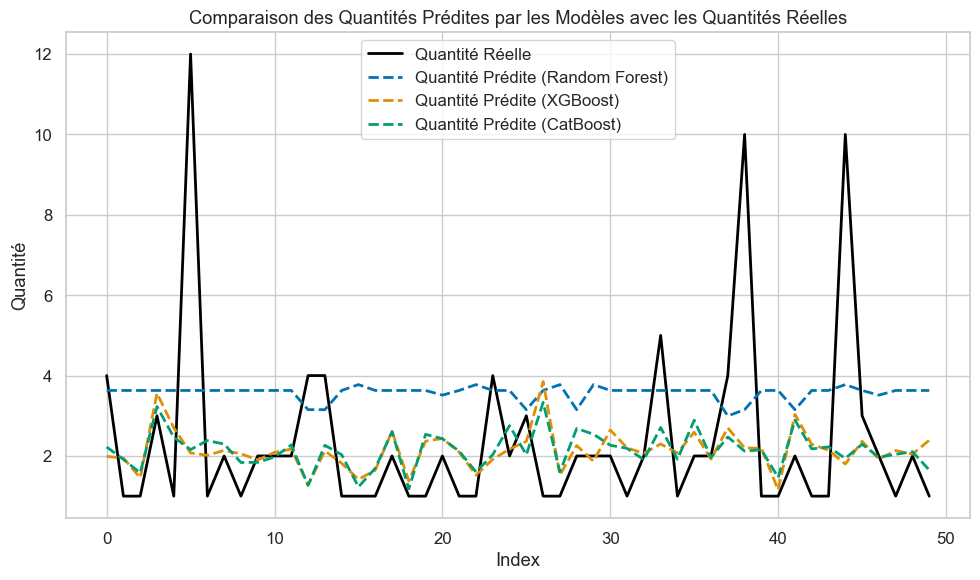

In [ ]:
import matplotlib.pyplot as plt

# Crée un DataFrame avec les quantités réelles et prédites pour chaque modèle
results_comparison = pd.DataFrame({
    'Quantité_Réelle': y_test_raw[:50],  # Quantité réelle (sélectionner les 50 premières valeurs pour l'affichage)
    'Quantité_Predite_RF': rf_predictions[:50],  # Quantité prédite par Random Forest
    'Quantité_Predite_XGB': xgb_predictions[:50],  # Quantité prédite par XGBoost
    'Quantité_Predite_CB': catboost_predictions[:50]  # Quantité prédite par CatBoost
})

# Création du graphique
plt.figure(figsize=(10, 6))

# Tracer les courbes
plt.plot(results_comparison['Quantité_Réelle'].values, label='Quantité Réelle', color='black', linewidth=2)
plt.plot(results_comparison['Quantité_Predite_RF'].values, label='Quantité Prédite (Random Forest)', linestyle='--', linewidth=2)
plt.plot(results_comparison['Quantité_Predite_XGB'].values, label='Quantité Prédite (XGBoost)', linestyle='--', linewidth=2)
plt.plot(results_comparison['Quantité_Predite_CB'].values, label='Quantité Prédite (CatBoost)', linestyle='--', linewidth=2)

# Ajouter un titre et des labels
plt.title('Comparaison des Quantités Prédites par les Modèles avec les Quantités Réelles')
plt.xlabel('Index')
plt.ylabel('Quantité')
plt.legend()

# Ajouter une grille pour une meilleure visibilité
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['Horizon', 'Fréquence', 'Article_Fournisseur','Coût unitaire normalisé','Quantité_kg','Nombre commandes normalisé']
# Suppression des colonnes
achats = achats.drop(columns=colonnes_a_supprimer)

KeyError: "['Quantité_kg'] not found in axis"

In [ ]:
achats

,N°commande,Code article,Article,Type article,Quantité,UM,Date commande,Date réception,conformité,Code Fournisseur,...,Respect_délais,Taux de Respect (%),Score,Catégorie,Mois,Année,Jour,Type article_encoded,Code article_encoded,Code Fournisseur_encoded
0,22000002,HSDR0007,SRTJ du E2:E13530/11/2021.,Produit matière première,1.0,UN,2022-01-03,2022-01-12,1,5006997,...,1,94.117647,6.825537,Moyen,1,2022,3,4,481,242
1,22000002,P6311047,FUEL LOURD N°2,Énergie/Carburant,30.0,TN,2022-01-04,2022-01-20,1,5005182,...,0,99.940982,6.886661,Moyen,1,2022,4,7,1540,36
2,22000003,M30511105,FILM THERMORÉTRACTABLE NG 40µ,Service,45000.0,KG,2022-01-05,2022-01-30,1,5006889,...,0,95.000000,6.852617,Moyen,1,2022,5,6,648,223
3,22000003,HSDLI007,reparation palettes,Service,3402.0,UN,2022-01-03,2022-01-15,1,5007369,...,0,97.674419,6.935975,Moyen,1,2022,3,6,477,348
4,22000003,P9523007,Glasse de niv Type A N°7 A/JTS,Matériel,2.0,PC,2022-01-04,2022-01-10,1,5005182,...,1,99.940982,6.883973,Moyen,1,2022,4,2,1816,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,24900731,HSCLN0015,frais de participation,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,1,100.000000,7.025381,Moyen,10,2024,24,6,442,26
23079,24900731,HSCLN0015,hebergement,Service,2.0,PI,2024-10-24,2024-10-31,1,559911,...,1,100.000000,7.025392,Moyen,10,2024,24,6,442,26
23080,24900732,HSCLN0014,Abonnement salle de sport,Service,1.0,PI,2024-10-24,2024-10-31,1,559911,...,1,100.000000,7.025380,Moyen,10,2024,24,6,441,26
23081,24900733,HSCLN0032,disque dur externe SSD 512 go,Matériel,1.0,PI,2024-10-24,2024-10-31,1,550645,...,1,97.916667,6.962161,Moyen,10,2024,24,2,459,21


In [ ]:
import joblib

joblib.dump(rf_model, 'rf_model.pkl')

joblib.dump(le, 'label_encoder.pkl')
joblib.dump(le_article,"label_encoder_article.pkl")



['label_encoder_fournisseur.pkl']

In [ ]:
import joblib

# Sauvegarde du modèle localement
joblib.dump(catboost_model, "catboost_model.pkl")
print("✅ Modèle sauvegardé localement sous 'catboost_model.pkl'")
#💾 Sauvegarde des résultats dans un fichier CSV
results_catboost.to_csv("resultats_catboost.csv", index=False)
print("✅ Résultats sauvegardés dans 'resultats_catboost.csv'")

✅ Modèle sauvegardé localement sous 'catboost_model.pkl'
✅ Résultats sauvegardés dans 'resultats_catboost.csv'


In [ ]:
# Sauvegarde du DataFrame dans un fichier CSV
achats.to_csv("dataframe_achats.csv", index=False)



print("✅ DataFrame sauvegardé dans 'dataframe_achats.csv'")



✅ DataFrame sauvegardé dans 'dataframe_achats.csv'


In [ ]:
achats.shape